<a href="https://colab.research.google.com/github/damar3c50/rfm_churn_clv/blob/main/RFM_Churn_Analysis_Customer_Lifetime_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates

!pip install lifetimes
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/US  E-commerce records 2020.csv', encoding='windows-1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [3]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [4]:
df['Customer ID'].value_counts()

SV-20365    20
JL-15835    20
MH-18115    19
Dp-13240    19
LC-16870    17
            ..
LW-16825     1
NW-18400     1
TN-21040     1
BF-10975     1
JM-15580     1
Name: Customer ID, Length: 693, dtype: int64

#Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [6]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [7]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.head()

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [8]:
#Mencari order yang mencurigakan dimana nilai profit lebih besar dari nilai sales
df[(df['sales'] < df['profit'])]

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit


In [9]:
#Mencari tau nilai profit yang negatif
df[(df['profit'] < 0)]

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
5,01-01-20,8072,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
7,01-01-20,8074,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050
8,01-01-20,8075,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,28-12-20,6820,CA-2017-163860,Standard Class,LO-17170,Corporate,United States,Peoria,Illinois,61604,Central,FUR-FU-10004586,Furniture,Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,7.968,3,0.6,-2.3904
3287,28-12-20,6821,CA-2017-163860,Standard Class,LO-17170,Corporate,United States,Peoria,Illinois,61604,Central,FUR-CH-10004698,Furniture,Chairs,"Padded Folding Chairs, Black, 4/Carton",113.372,2,0.3,-3.2392
3288,28-12-20,6822,CA-2017-163860,Standard Class,LO-17170,Corporate,United States,Peoria,Illinois,61604,Central,FUR-FU-10001935,Furniture,Furnishings,3M Hangers With Command Adhesive,2.960,2,0.6,-1.4060
3293,29-12-20,1878,CA-2017-118885,Standard Class,JG-15160,Consumer,United States,Los Angeles,California,90049,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764


In [10]:
find = df.groupby('customer_id')['profit'].sum()
find = find.reset_index()
find.head()

,customer_id,profit
0,AA-10315,96.5050
1,AA-10375,68.9195
2,AA-10480,5.4432
3,AA-10645,6.2208
4,AB-10060,477.8292


In [11]:
find[(find['profit'] < 0)]

,customer_id,profit
9,AB-10600,-256.5716
10,AC-10420,-69.0620
13,AC-10660,-32.3388
15,AF-10870,-74.8469
18,AG-10330,-66.8801
...,...,...
670,TS-21610,-9.9184
671,TS-21655,-110.0444
675,TW-21025,-6.0650
684,VP-21760,-964.4829


In [12]:
find[(find['customer_id'] == 'JM-15250')]

,customer_id,profit
344,JM-15250,-135.4104


###**Change Data Types**

In [13]:
df['order_date']= pd.to_datetime(df['order_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    3312 non-null   datetime64[ns]
 1   row_id        3312 non-null   int64         
 2   order_id      3312 non-null   object        
 3   ship_mode     3312 non-null   object        
 4   customer_id   3312 non-null   object        
 5   segment       3312 non-null   object        
 6   country       3312 non-null   object        
 7   city          3312 non-null   object        
 8   state         3312 non-null   object        
 9   postal_code   3312 non-null   int64         
 10  region        3312 non-null   object        
 11  product_id    3312 non-null   object        
 12  category      3312 non-null   object        
 13  sub-category  3312 non-null   object        
 14  product_name  3312 non-null   object        
 15  sales         3312 non-null   float64 

###**Missing Values**

In [14]:
df.isna().sum()

order_date      0
row_id          0
order_id        0
ship_mode       0
customer_id     0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
product_id      0
category        0
sub-category    0
product_name    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

###**Duplicated**

In [15]:
#Check duplicated rows and count it
duplicated_rows = df[df.duplicated(keep=False)].groupby(df.columns.tolist()).size().reset_index(name='count')

print(duplicated_rows)

Empty DataFrame
Columns: [order_date, row_id, order_id, ship_mode, customer_id, segment, country, city, state, postal_code, region, product_id, category, sub-category, product_name, sales, quantity, discount, profit, count]
Index: []


###**Outliers**

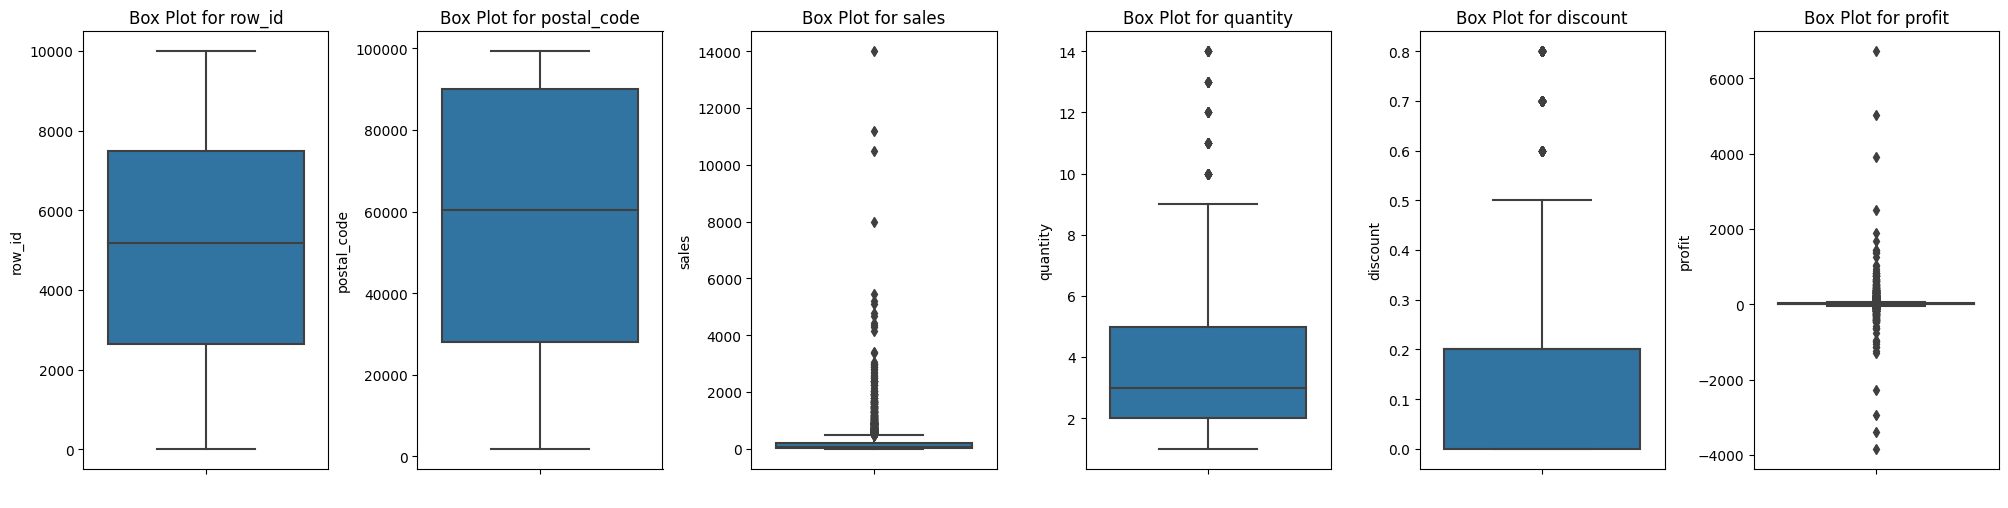

In [16]:
#Check Outliers
num_cols = df.select_dtypes(include=['int', 'float']).columns

#Create box plot
fig, axs = plt.subplots(ncols=len(num_cols), figsize=(20,5))

for i, column in enumerate(num_cols):
  sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
  axs[i].set_title(f'Box Plot for {column}')
  axs[i].set_xlabel(' ')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [17]:
num_cols = df.select_dtypes(include=['int', 'float'])

Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
upper_values = Q3 + (1.5 * IQR)
lower_values = Q1 - (1.5 * IQR)

outlier_count = ((num_cols < lower_values) | (num_cols > upper_values)).sum()
total_data_points = len(num_cols)
outlier_proportion = (outlier_count/total_data_points)*100

outlier_list = {}
for col in num_cols.columns:
  outliers = num_cols[col][(num_cols[col] < lower_values[col]) | (num_cols[col] > upper_values[col])]
  outlier_list[col] = outliers

outlier_df = pd.DataFrame({
    'Outlier Count':outlier_count,
    'Outlier Proportion %': outlier_proportion,
    'Outlier List':outlier_list
})

outlier_df

,Outlier Count,Outlier Proportion %,Outlier List
row_id,0,0.000000,"Series([], Name: row_id, dtype: int64)"
postal_code,0,0.000000,"Series([], Name: postal_code, dtype: int64)"
sales,366,11.050725,10 695.700 15 913.430 19 2022...
quantity,54,1.630435,1 11 8 14 24 11 494 13 50...
discount,284,8.574879,4 0.6 7 0.8 8 0.8 9 0....
profit,638,19.263285,1 199.2606 3 -107.9580 4 -187....


In [18]:
num_cols = df.select_dtypes(include=['int', 'float']).columns

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
max = Q3 + (1.5 * IQR)
min = Q1 - (1.5 * IQR)

df[num_cols] = df[num_cols].clip(lower=min, upper=max, axis=1)
print(df[num_cols].describe())

            row_id   postal_code        sales     quantity     discount  \
count  3312.000000   3312.000000  3312.000000  3312.000000  3312.000000   
mean   5087.107488  56186.515097   135.089943     3.733696     0.137264   
std    2817.482266  31980.375516   162.138018     2.110051     0.157375   
min      13.000000   1841.000000     0.444000     1.000000     0.000000   
25%    2655.750000  27978.750000    17.018000     2.000000     0.000000   
50%    5183.500000  60472.500000    53.810000     3.000000     0.200000   
75%    7498.250000  90032.000000   205.105700     5.000000     0.200000   
max    9994.000000  99301.000000   487.237250     9.500000     0.500000   

            profit  
count  3312.000000  
mean     15.469173  
std      28.517624  
min     -38.064688  
25%       1.763200  
50%       8.296800  
75%      28.315125  
max      68.143012  


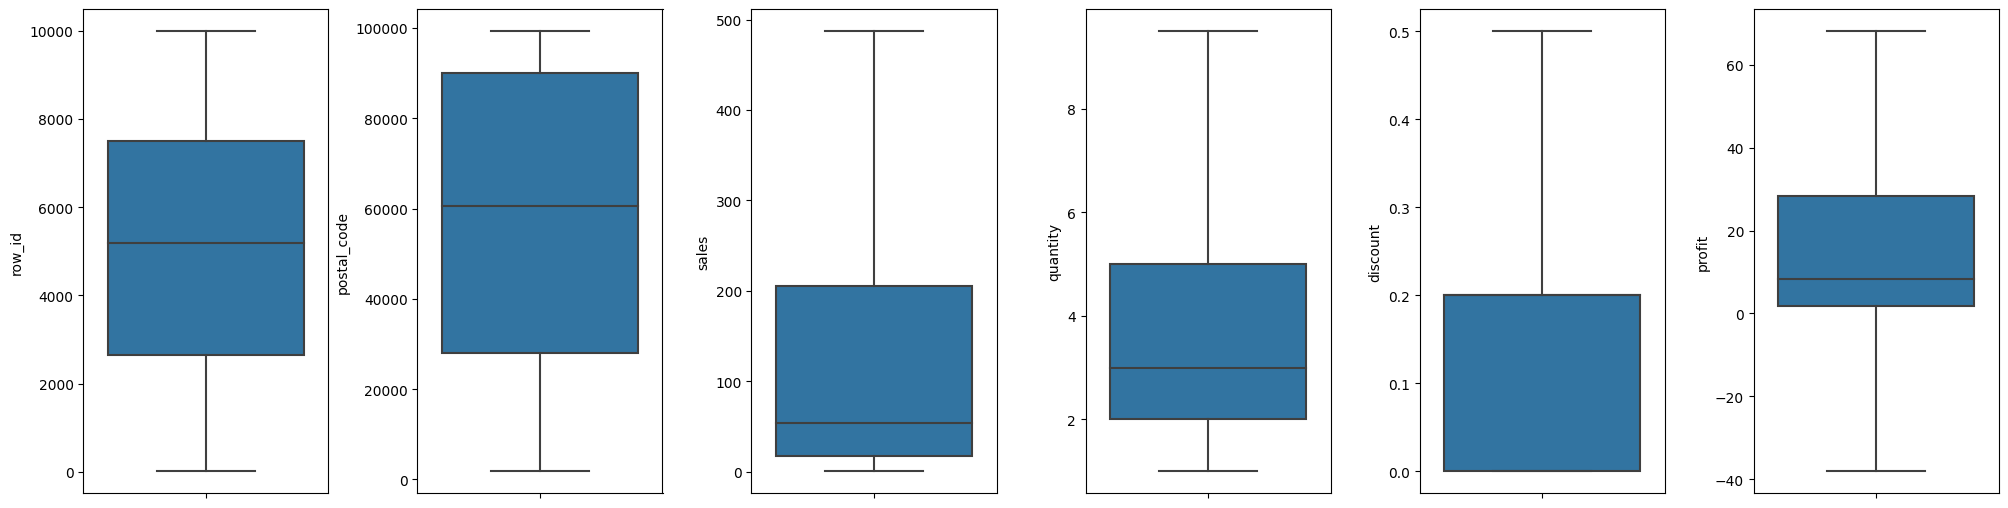

In [19]:
fig, axs = plt.subplots(ncols=len(num_cols), figsize=(20, 5))
for i, column in enumerate(num_cols):
  sns.boxplot(y=column, data=df, ax=axs[i])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

#EDA

###Univariate Analysis

**Numeric Columns**

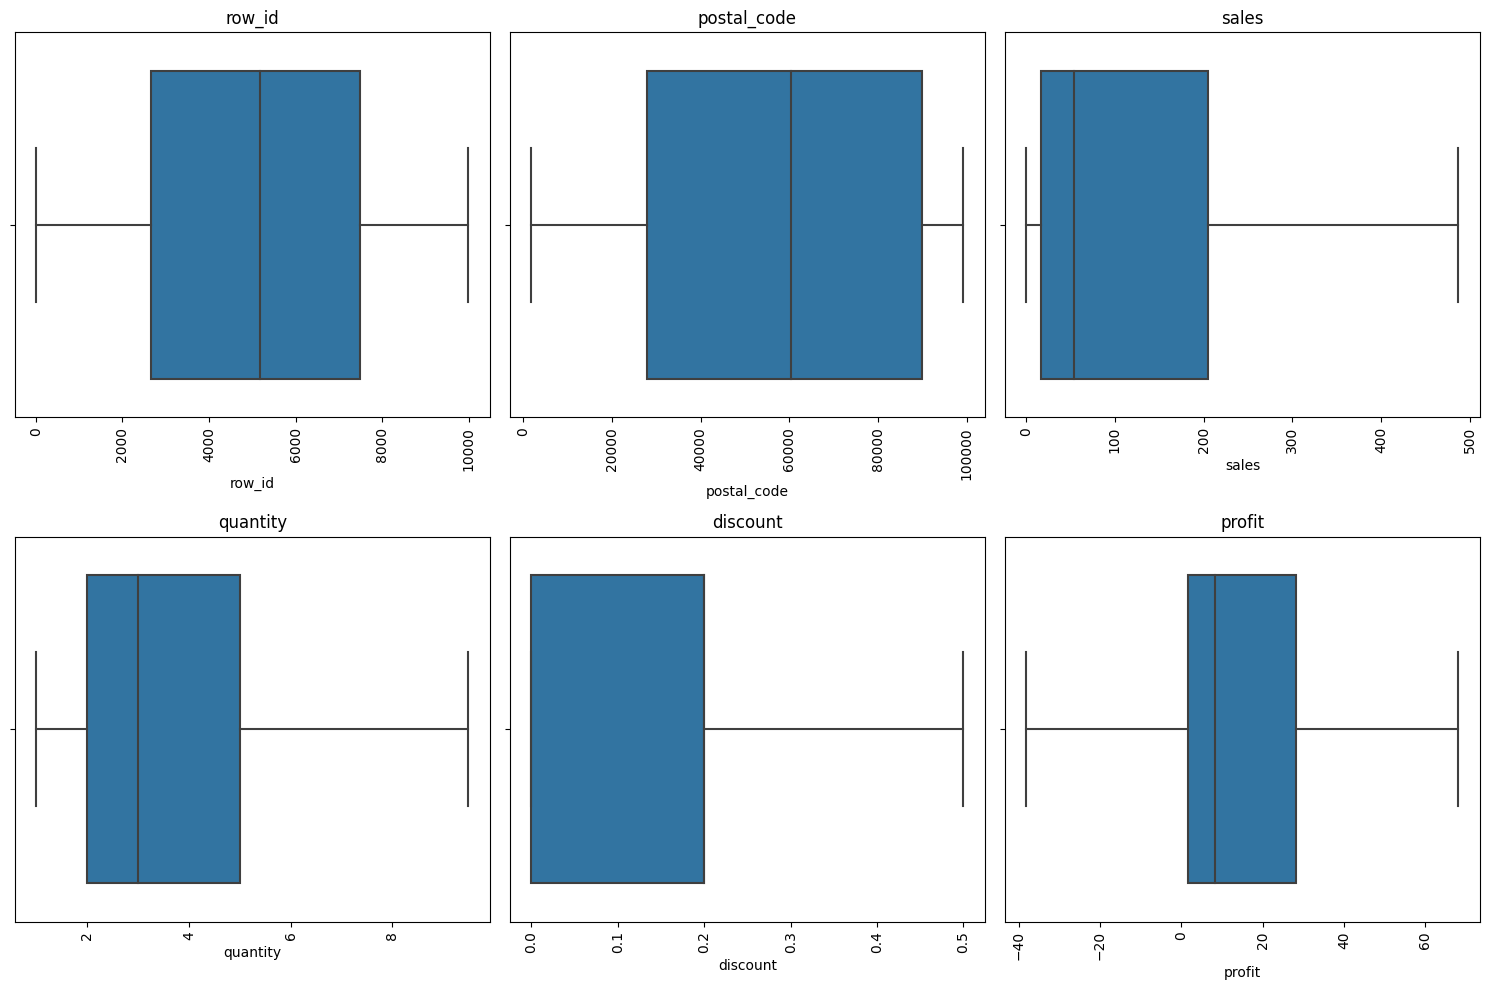

In [20]:
vars = df.select_dtypes(include=['int', 'float']).columns

# Create a figure
num_cols = len(vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

#Create a countplot for top 5 of each categorical
for i, var in enumerate(vars):
  top_values = df[var].value_counts().index
  filtered_df = df[df[var].isin(top_values)]
  sns.boxplot(x=var, data=filtered_df, ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x', rotation=90)

#Rmove any extra empty subplots if needed
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#Show plot
plt.show()

**Categorical Columns**

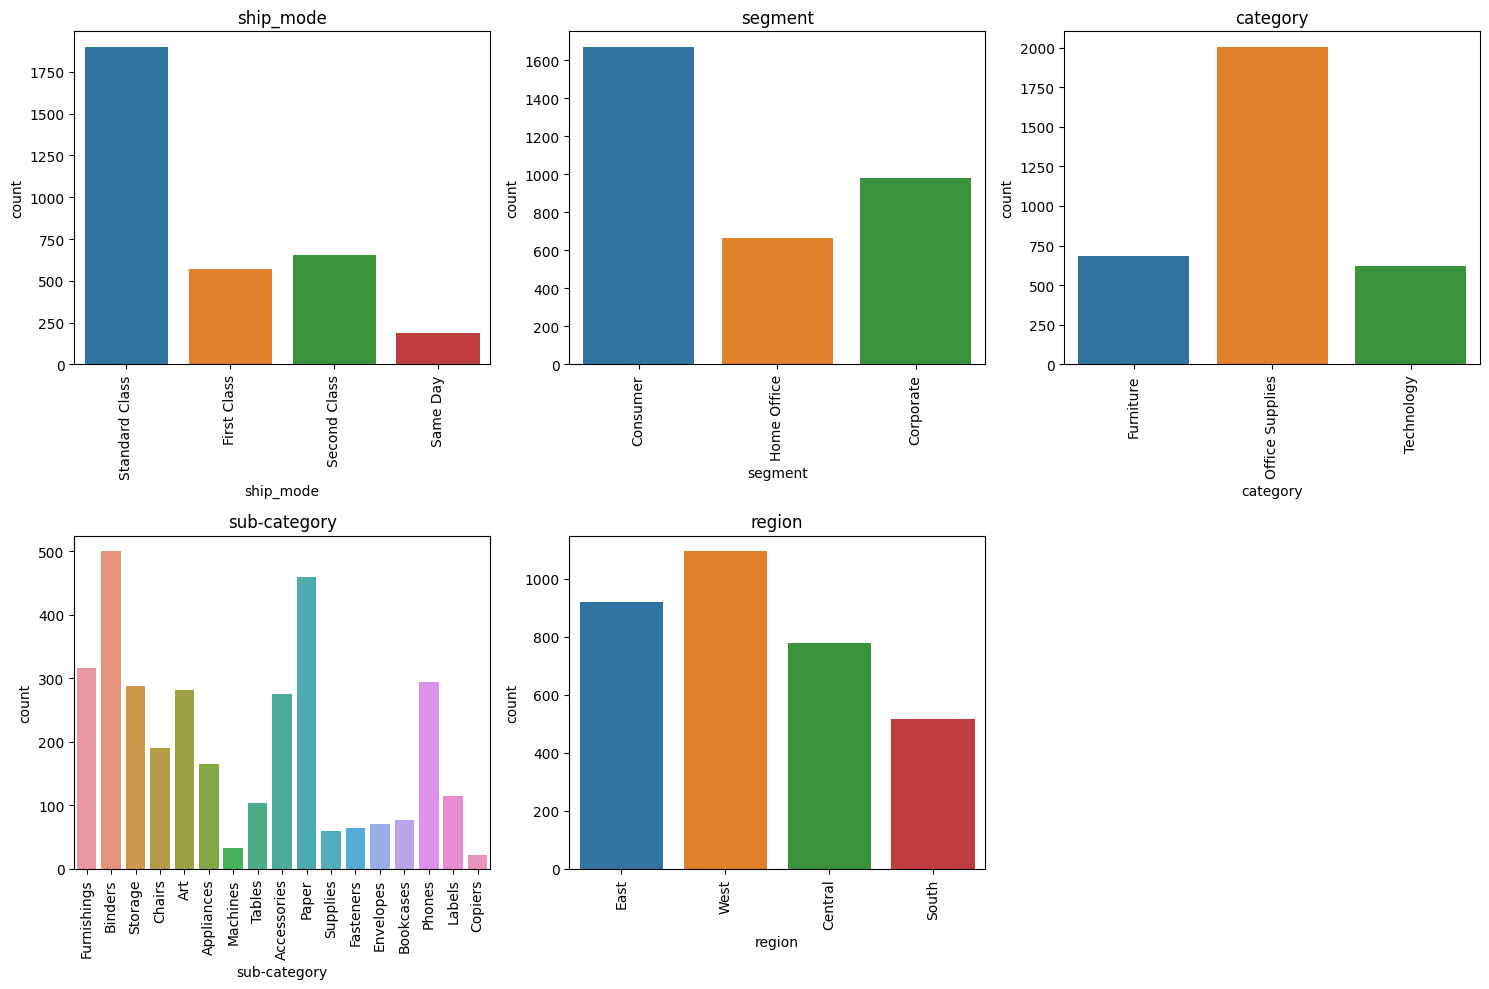

In [21]:
cols = df[['ship_mode', 'segment', 'category', 'sub-category', 'region']].columns.tolist()

# Create a figure
num_cols = len(cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

#Create a countplot for top 5 of each categorical
for i, var in enumerate(cols):
  top_values = df[var].value_counts().index
  filtered_df = df[df[var].isin(top_values)]
  sns.countplot(x=var, data=filtered_df, ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x', rotation=90)

#Rmove any extra empty subplots if needed
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

#Adjust spacing between subplots
fig.tight_layout()

#Show plot
plt.show()

###Bivariate Analysis

**Numerical vs Numerical**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    3312 non-null   datetime64[ns]
 1   row_id        3312 non-null   int64         
 2   order_id      3312 non-null   object        
 3   ship_mode     3312 non-null   object        
 4   customer_id   3312 non-null   object        
 5   segment       3312 non-null   object        
 6   country       3312 non-null   object        
 7   city          3312 non-null   object        
 8   state         3312 non-null   object        
 9   postal_code   3312 non-null   int64         
 10  region        3312 non-null   object        
 11  product_id    3312 non-null   object        
 12  category      3312 non-null   object        
 13  sub-category  3312 non-null   object        
 14  product_name  3312 non-null   object        
 15  sales         3312 non-null   float64 

In [23]:
def num_num(x, y):
  fig = px.scatter(df, x=x, y=y,
                   title=f'Scatter Plot: {x} vs {y}')
  fig.show()

num_num('sales', 'quantity')

In [24]:
num_num('sales', 'profit')

In [25]:
num_num('quantity', 'profit')

**Categorical vs Numerical**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    3312 non-null   datetime64[ns]
 1   row_id        3312 non-null   int64         
 2   order_id      3312 non-null   object        
 3   ship_mode     3312 non-null   object        
 4   customer_id   3312 non-null   object        
 5   segment       3312 non-null   object        
 6   country       3312 non-null   object        
 7   city          3312 non-null   object        
 8   state         3312 non-null   object        
 9   postal_code   3312 non-null   int64         
 10  region        3312 non-null   object        
 11  product_id    3312 non-null   object        
 12  category      3312 non-null   object        
 13  sub-category  3312 non-null   object        
 14  product_name  3312 non-null   object        
 15  sales         3312 non-null   float64 

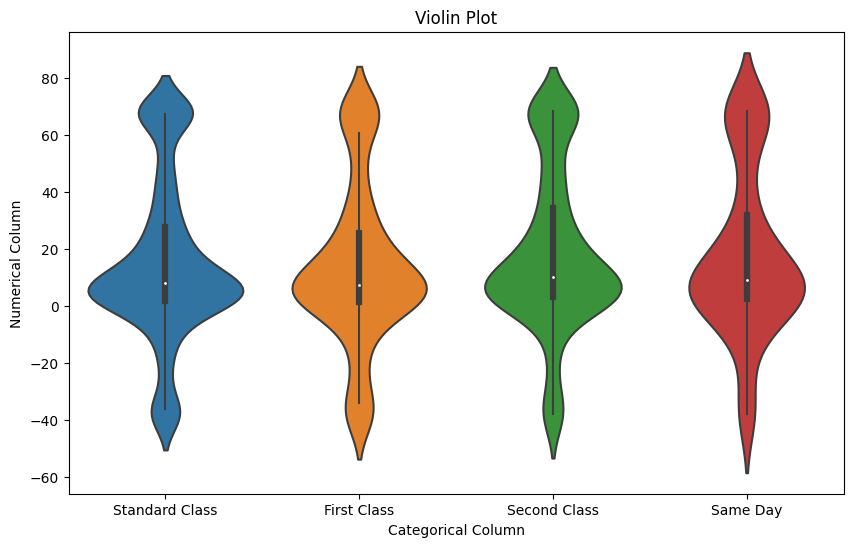

In [27]:
def catnum(x, y):
  plt.figure(figsize=(10,6))
  sns.violinplot(x=x, y=y, data=df)
  plt.title('Violin Plot')
  plt.xlabel('Categorical Column')
  plt.ylabel('Numerical Column')
  plt.show()

catnum('ship_mode', 'profit')

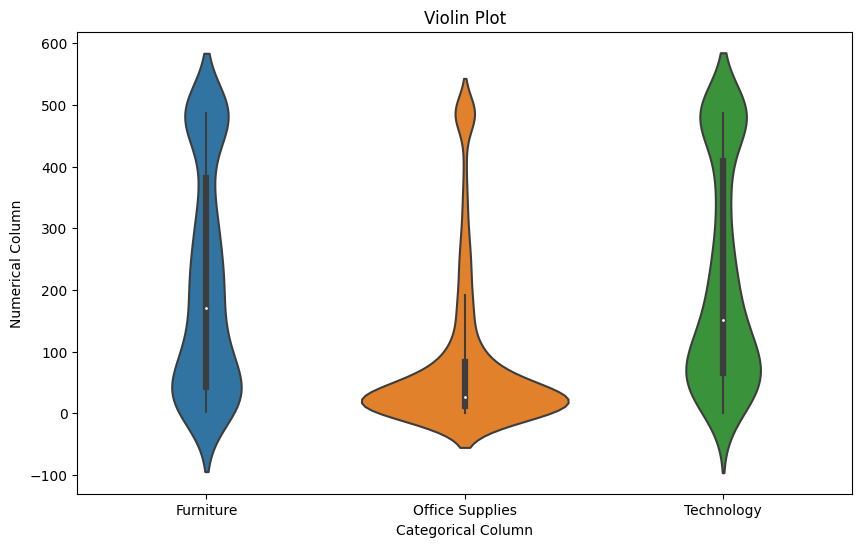

In [28]:
catnum('category', 'sales')

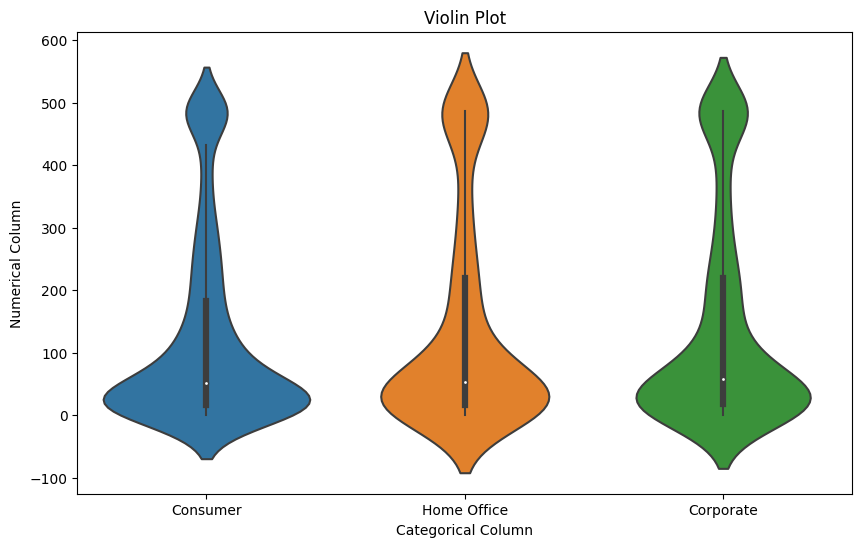

In [29]:
catnum('segment', 'sales')

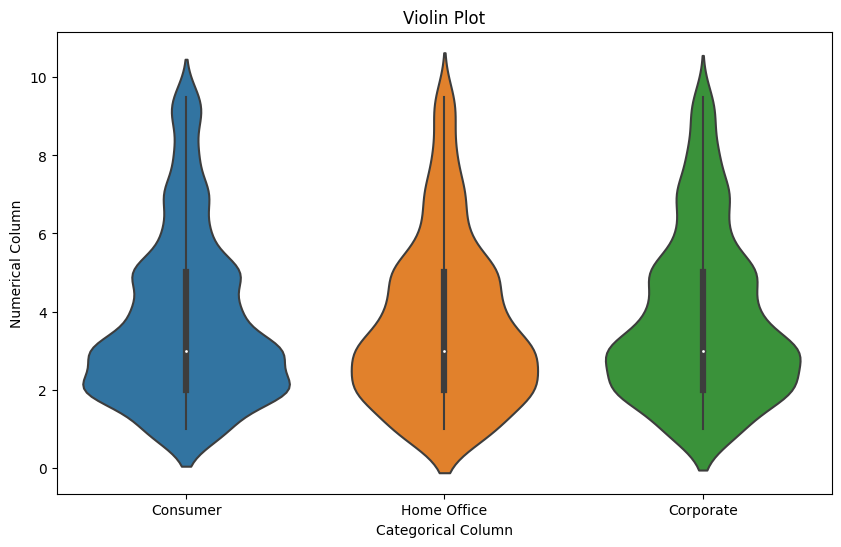

In [30]:
catnum('segment', 'quantity')

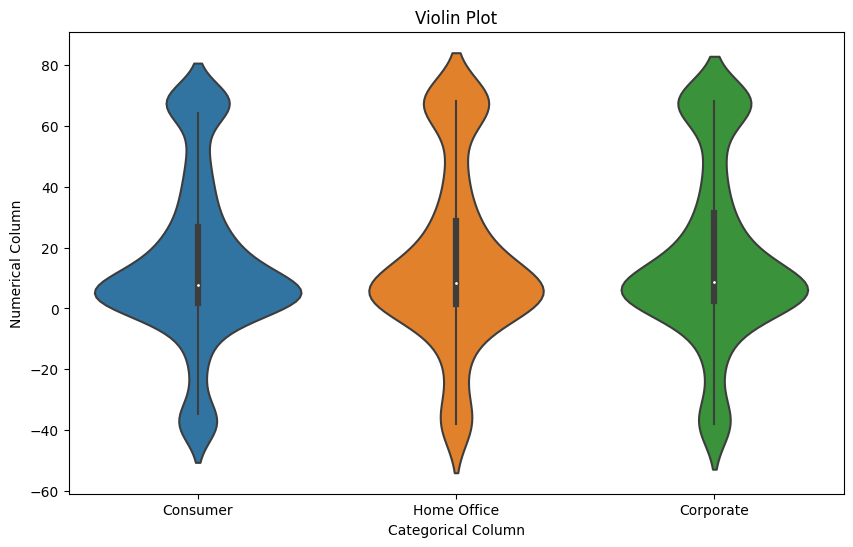

In [31]:
catnum('segment', 'profit')

**Categorical vs Categorical**

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    3312 non-null   datetime64[ns]
 1   row_id        3312 non-null   int64         
 2   order_id      3312 non-null   object        
 3   ship_mode     3312 non-null   object        
 4   customer_id   3312 non-null   object        
 5   segment       3312 non-null   object        
 6   country       3312 non-null   object        
 7   city          3312 non-null   object        
 8   state         3312 non-null   object        
 9   postal_code   3312 non-null   int64         
 10  region        3312 non-null   object        
 11  product_id    3312 non-null   object        
 12  category      3312 non-null   object        
 13  sub-category  3312 non-null   object        
 14  product_name  3312 non-null   object        
 15  sales         3312 non-null   float64 

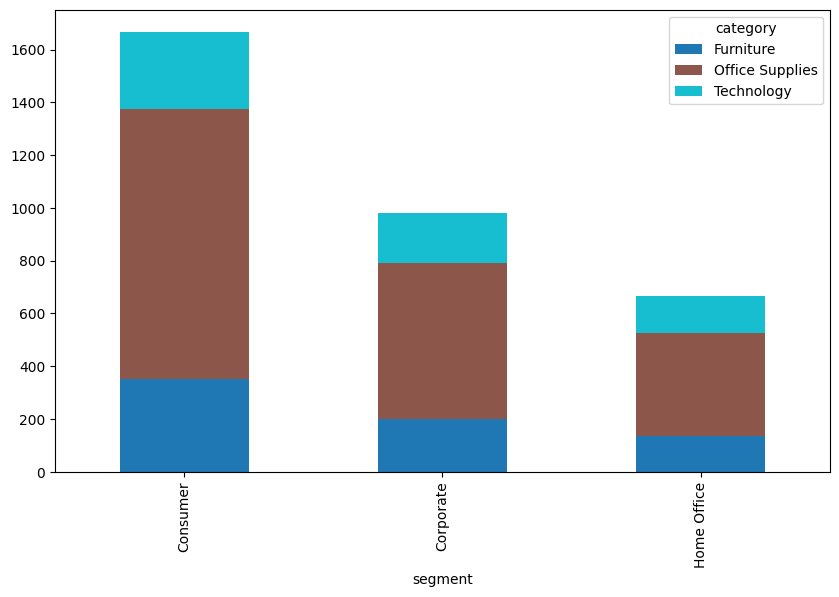

In [33]:
def cat_cat(x, y):
  cross_tab = pd.crosstab(index=df[x],
                          columns=df[y])
  cross_tab.plot(kind='bar', stacked=True, colormap='tab10', figsize=(10,6))
  plt.show()

cat_cat('segment', 'category')

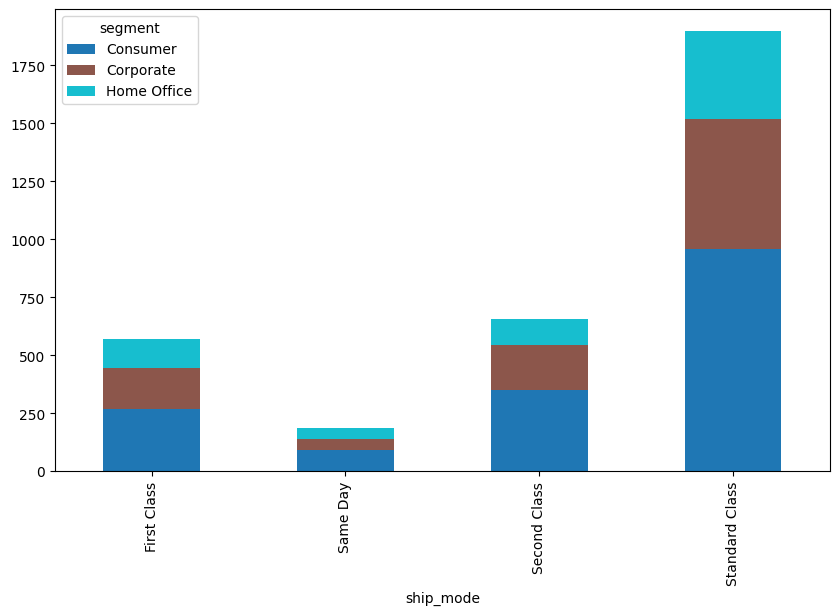

In [34]:
cat_cat('ship_mode', 'segment')

###Multivariate

In [35]:
df.head()

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4.0,0.2,8.556800
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,9.5,0.0,68.143012
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2.0,0.0,1.728000
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5.0,0.2,-38.064688
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5.0,0.5,-38.064688


In [36]:
#Correlation
correlation_matrix = df.select_dtypes(include=['number']).corr()

fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Cividis',
                title='Correlation Heatmap')

fig.update_layout(width=800, height=600)
fig.show()

In [37]:
def multivariate(x, y, z):
  fig=px.scatter(df, x=x, y=y, color=z)
  fig.show()

multivariate('sales', 'profit','segment')

In [38]:
multivariate('sales','profit','state')

In [39]:
multivariate('sales','profit','quantity')

In [40]:
df.head()

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4.0,0.2,8.556800
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,9.5,0.0,68.143012
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2.0,0.0,1.728000
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5.0,0.2,-38.064688
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5.0,0.5,-38.064688


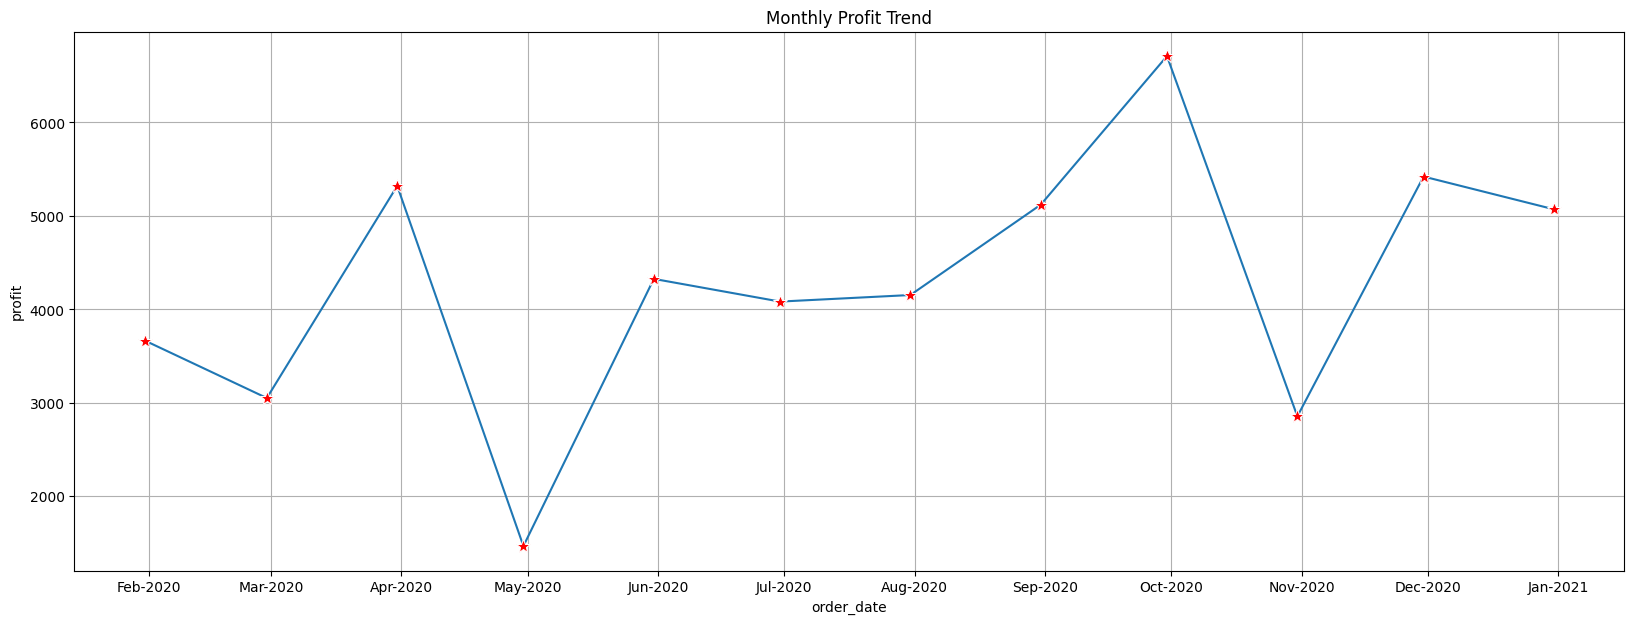

In [41]:
#Plot monthly trend
monthly_profit = df.groupby(by=pd.Grouper(key='order_date', freq='1M'))['profit'].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Profit Trend')

ax = sns.lineplot(
    x=monthly_profit.index,
    y=monthly_profit,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.grid()
plt.show()

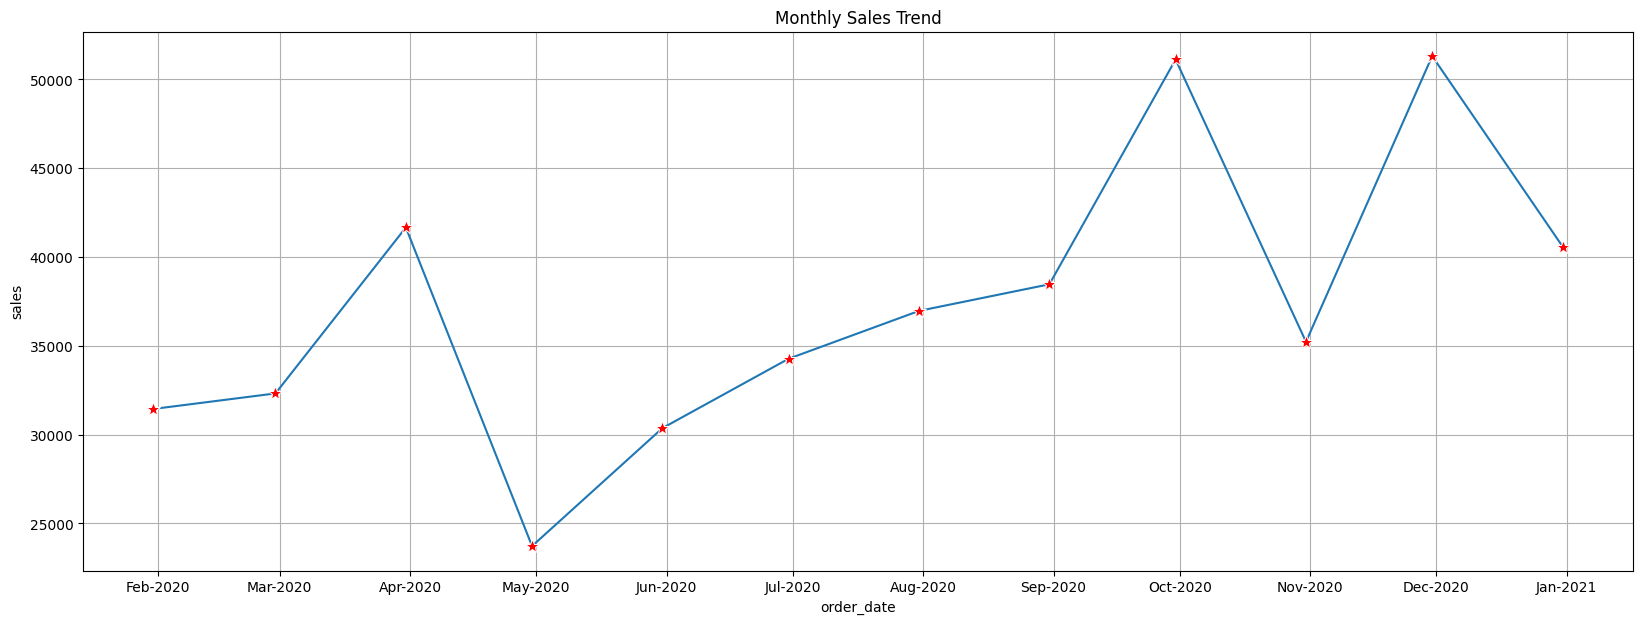

In [42]:
monthly_sales = df.copy()
monthly_sales = monthly_sales.groupby(
    by=pd.Grouper(key='order_date', freq='1M')
)['sales'].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Sales Trend')

ax = sns.lineplot(
    x=monthly_sales.index,
    y=monthly_sales,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show()

#RFM

###Recency

In [43]:
df_rfm = df.copy()

In [44]:
recency = df_rfm.groupby('customer_id')['order_date'].max()
recency.reset_index().head()

,customer_id,order_date
0,AA-10315,2020-06-29
1,AA-10375,2020-11-12
2,AA-10480,2020-04-15
3,AA-10645,2020-05-11
4,AB-10060,2020-09-16


In [45]:
max_date = df_rfm['order_date'].max()
max_date

Timestamp('2020-12-30 00:00:00')

In [46]:
recency = max_date - recency
recency.head()

customer_id
AA-10315   184 days
AA-10375    48 days
AA-10480   259 days
AA-10645   233 days
AB-10060   105 days
Name: order_date, dtype: timedelta64[ns]

In [47]:
recency = recency.dt.days
recency = recency.rename('Recency')
recency.head(10)

customer_id
AA-10315    184
AA-10375     48
AA-10480    259
AA-10645    233
AB-10060    105
AB-10105     41
AB-10150     41
AB-10165    106
AB-10255    166
AB-10600     80
Name: Recency, dtype: int64

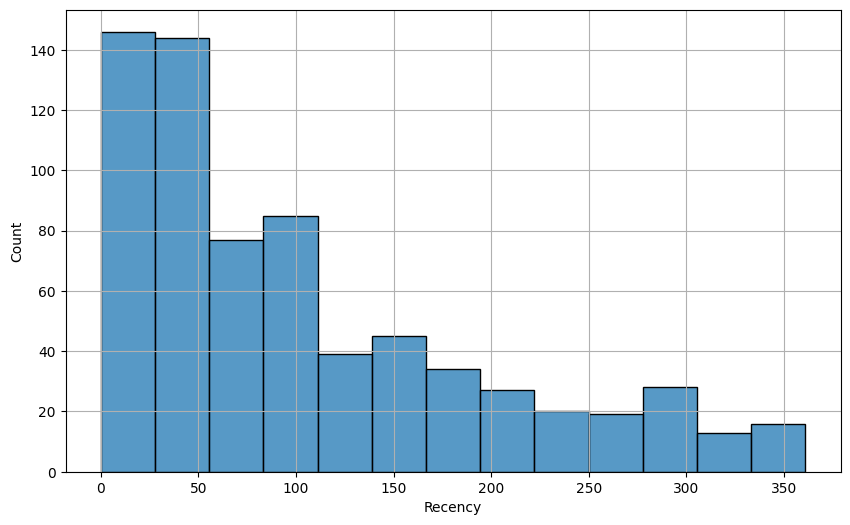

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(recency)
plt.grid()
plt.show()

In [49]:
recency.describe()

count    693.000000
mean     104.477633
std       92.508732
min        0.000000
25%       34.000000
50%       75.000000
75%      158.000000
max      361.000000
Name: Recency, dtype: float64

In [50]:
recency = recency.reset_index()
recency.head()

,customer_id,Recency
0,AA-10315,184
1,AA-10375,48
2,AA-10480,259
3,AA-10645,233
4,AB-10060,105


###Frequency

In [51]:
frequency = df_rfm.groupby('customer_id')['quantity'].sum()
frequency.head()

customer_id
AA-10315     5.0
AA-10375    13.0
AA-10480     3.0
AA-10645     2.0
AB-10060    30.5
Name: quantity, dtype: float64

In [52]:
frequency = frequency.rename('Frequency')
frequency.head()

customer_id
AA-10315     5.0
AA-10375    13.0
AA-10480     3.0
AA-10645     2.0
AB-10060    30.5
Name: Frequency, dtype: float64

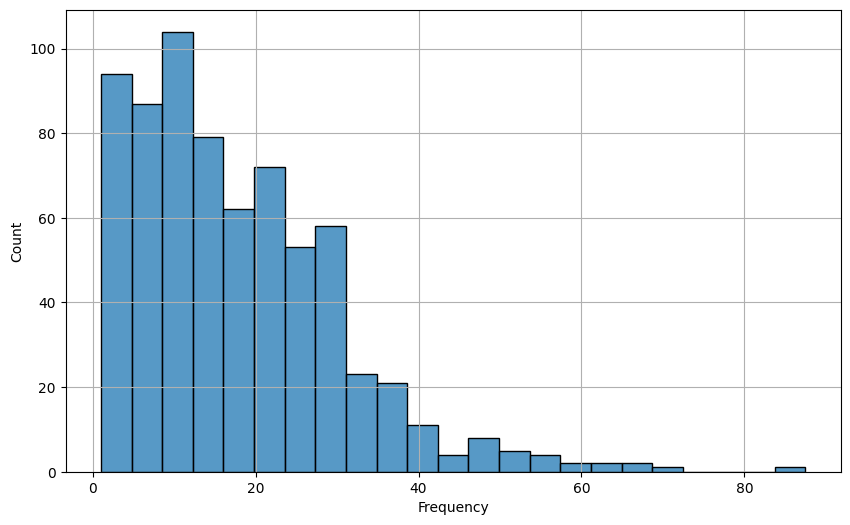

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(frequency)
plt.grid()
plt.show()

In [54]:
frequency = frequency.reset_index()
frequency.head()

,customer_id,Frequency
0,AA-10315,5.0
1,AA-10375,13.0
2,AA-10480,3.0
3,AA-10645,2.0
4,AB-10060,30.5


In [55]:
frequency['Frequency'] = frequency['Frequency'].astype('int')
frequency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  693 non-null    object
 1   Frequency    693 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.0+ KB


###Monetary

In [56]:
df_rfm['total'] = df_rfm['sales'] * df_rfm['quantity']
monetary = df_rfm.groupby('customer_id')['total'].sum()
monetary.head()

customer_id
AA-10315    1111.90000
AA-10375     467.15200
AA-10480      46.65600
AA-10645      25.92000
AB-10060    5951.94075
Name: total, dtype: float64

In [57]:
monetary = monetary.rename('Monetary')
monetary.head()

customer_id
AA-10315    1111.90000
AA-10375     467.15200
AA-10480      46.65600
AA-10645      25.92000
AB-10060    5951.94075
Name: Monetary, dtype: float64

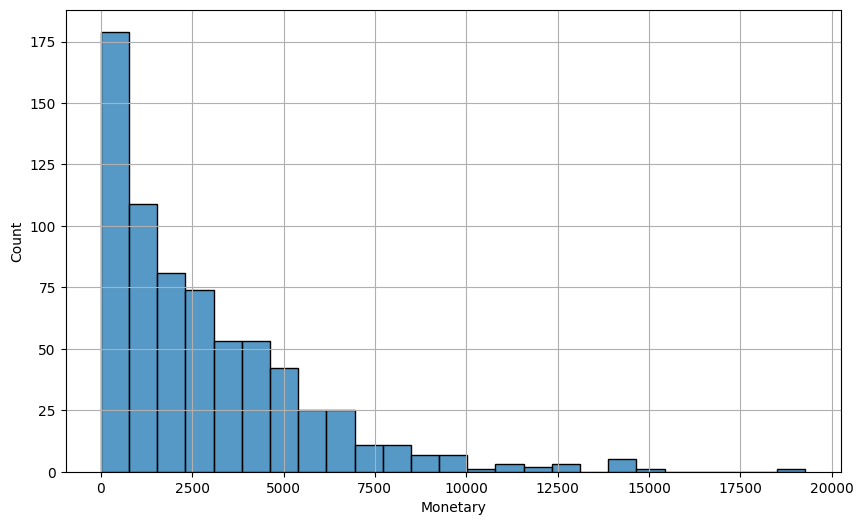

In [58]:
plt.figure(figsize=(10,6))
sns.histplot(monetary)
plt.grid()
plt.show()

In [59]:
monetary = monetary.reset_index()
monetary.head()

,customer_id,Monetary
0,AA-10315,1111.90000
1,AA-10375,467.15200
2,AA-10480,46.65600
3,AA-10645,25.92000
4,AB-10060,5951.94075


In [60]:
monetary.describe()

,Monetary
count,693.000000
mean,2827.195792
std,2783.535581
min,2.376000
25%,739.550000
50%,2072.648000
75%,4162.232000
max,19282.318500


###Merge RFM Result

In [61]:
recency.head()

,customer_id,Recency
0,AA-10315,184
1,AA-10375,48
2,AA-10480,259
3,AA-10645,233
4,AB-10060,105


In [62]:
frequency.head()

,customer_id,Frequency
0,AA-10315,5
1,AA-10375,13
2,AA-10480,3
3,AA-10645,2
4,AB-10060,30


In [63]:
new = recency.merge(frequency, on='customer_id')
new

,customer_id,Recency,Frequency
0,AA-10315,184,5
1,AA-10375,48,13
2,AA-10480,259,3
3,AA-10645,233,2
4,AB-10060,105,30
...,...,...,...
688,XP-21865,43,20
689,YC-21895,4,2
690,YS-21880,9,38
691,ZC-21910,54,22


In [64]:
data_rfm = new.merge(monetary, on='customer_id')
data_rfm.head()

,customer_id,Recency,Frequency,Monetary
0,AA-10315,184,5,1111.90000
1,AA-10375,48,13,467.15200
2,AA-10480,259,3,46.65600
3,AA-10645,233,2,25.92000
4,AB-10060,105,30,5951.94075


In [65]:
data_rfm

,customer_id,Recency,Frequency,Monetary
0,AA-10315,184,5,1111.90000
1,AA-10375,48,13,467.15200
2,AA-10480,259,3,46.65600
3,AA-10645,233,2,25.92000
4,AB-10060,105,30,5951.94075
...,...,...,...,...
688,XP-21865,43,20,1864.19200
689,YC-21895,4,2,974.47450
690,YS-21880,9,38,14156.65675
691,ZC-21910,54,22,1372.81400


###Defined RFM Score

In [66]:
rfm_score = data_rfm.copy()
rfm_score

,customer_id,Recency,Frequency,Monetary
0,AA-10315,184,5,1111.90000
1,AA-10375,48,13,467.15200
2,AA-10480,259,3,46.65600
3,AA-10645,233,2,25.92000
4,AB-10060,105,30,5951.94075
...,...,...,...,...
688,XP-21865,43,20,1864.19200
689,YC-21895,4,2,974.47450
690,YS-21880,9,38,14156.65675
691,ZC-21910,54,22,1372.81400


In [67]:
rfm_score.describe()

,Recency,Frequency,Monetary
count,693.000000,693.000000,693.000000
mean,104.477633,17.808081,2827.195792
std,92.508732,12.695038,2783.535581
min,0.000000,1.000000,2.376000
25%,34.000000,8.000000,739.550000
50%,75.000000,16.000000,2072.648000
75%,158.000000,25.000000,4162.232000
max,361.000000,87.000000,19282.318500


In [68]:
bin = [-1,35,76,159,362]
label = [1,2,3,4]
rfm_score.insert(2, 'Recency_score', pd.cut(rfm_score['Recency'],bins=bin, labels=label))
rfm_score


,customer_id,Recency,Recency_score,Frequency,Monetary
0,AA-10315,184,4,5,1111.90000
1,AA-10375,48,2,13,467.15200
2,AA-10480,259,4,3,46.65600
3,AA-10645,233,4,2,25.92000
4,AB-10060,105,3,30,5951.94075
...,...,...,...,...,...
688,XP-21865,43,2,20,1864.19200
689,YC-21895,4,1,2,974.47450
690,YS-21880,9,1,38,14156.65675
691,ZC-21910,54,2,22,1372.81400


In [69]:
rfm_score['Recency_score'].value_counts()

1    182
4    172
2    170
3    169
Name: Recency_score, dtype: int64

In [70]:
rfm_score[(rfm_score['Recency_score'].isna())]

,customer_id,Recency,Recency_score,Frequency,Monetary


In [71]:
bin = [0,9,17,26,88]
label = [1,2,3,4]
rfm_score.insert(4, 'Frequency_score', pd.cut(rfm_score['Frequency'], bins=bin,labels=label))
rfm_score

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary
0,AA-10315,184,4,5,1,1111.90000
1,AA-10375,48,2,13,2,467.15200
2,AA-10480,259,4,3,1,46.65600
3,AA-10645,233,4,2,1,25.92000
4,AB-10060,105,3,30,4,5951.94075
...,...,...,...,...,...,...
688,XP-21865,43,2,20,3,1864.19200
689,YC-21895,4,1,2,1,974.47450
690,YS-21880,9,1,38,4,14156.65675
691,ZC-21910,54,2,22,3,1372.81400


In [72]:
rfm_score[(rfm_score['Frequency_score'].isna())]

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary


In [73]:
rfm_score['Frequency_score'].value_counts()

1    209
2    184
4    152
3    148
Name: Frequency_score, dtype: int64

In [74]:
bin = [2.000000,740.550000,2075.648000,4165.232000,19290.318500]
label=[1,2,3,4]
rfm_score.insert(6,'Monetary_score', pd.cut(rfm_score['Monetary'],bins=bin,labels=label))
rfm_score

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score
0,AA-10315,184,4,5,1,1111.90000,2
1,AA-10375,48,2,13,2,467.15200,1
2,AA-10480,259,4,3,1,46.65600,1
3,AA-10645,233,4,2,1,25.92000,1
4,AB-10060,105,3,30,4,5951.94075,4
...,...,...,...,...,...,...,...
688,XP-21865,43,2,20,3,1864.19200,2
689,YC-21895,4,1,2,1,974.47450,2
690,YS-21880,9,1,38,4,14156.65675,4
691,ZC-21910,54,2,22,3,1372.81400,2


In [75]:
rfm_score[(rfm_score['Monetary_score'].isna())]

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score


In [76]:
rfm_score['Monetary_score'].value_counts()

1    175
3    173
4    173
2    172
Name: Monetary_score, dtype: int64

###Deep Dive in RFM Result

In [77]:
data_rfm.head()

,customer_id,Recency,Frequency,Monetary
0,AA-10315,184,5,1111.90000
1,AA-10375,48,13,467.15200
2,AA-10480,259,3,46.65600
3,AA-10645,233,2,25.92000
4,AB-10060,105,30,5951.94075


In [78]:
data_rfm.describe()

,Recency,Frequency,Monetary
count,693.000000,693.000000,693.000000
mean,104.477633,17.808081,2827.195792
std,92.508732,12.695038,2783.535581
min,0.000000,1.000000,2.376000
25%,34.000000,8.000000,739.550000
50%,75.000000,16.000000,2072.648000
75%,158.000000,25.000000,4162.232000
max,361.000000,87.000000,19282.318500


In [79]:
rfm_dive = data_rfm.copy()

In [80]:
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330,361]
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
rfm_dive['recency_cat'] = pd.cut(rfm_dive['Recency'], bins=bins, labels=labels)
rfm_dive.head()

,customer_id,Recency,Frequency,Monetary,recency_cat
0,AA-10315,184,5,1111.90000,7
1,AA-10375,48,13,467.15200,2
2,AA-10480,259,3,46.65600,9
3,AA-10645,233,2,25.92000,8
4,AB-10060,105,30,5951.94075,4


In [81]:
nyoba = rfm_dive.groupby('recency_cat')['Monetary'].sum()
nyoba

recency_cat
1     540047.205075
2     475327.042825
3     223567.192250
4     198412.481275
5     135087.966000
6     113966.369600
7      85674.681650
8      30537.174000
9      41518.973250
10     44342.578000
11     44066.416250
12     15485.903750
Name: Monetary, dtype: float64

In [82]:
rfm_dive[(rfm_dive['recency_cat'] > 4) & rfm_dive['Monetary'] > 2072.648000]

,customer_id,Recency,Frequency,Monetary,recency_cat


In [83]:
rfm_dive['recency_cat'].value_counts()

1     154
2     141
3      83
4      81
6      47
5      45
7      30
8      27
10     26
9      23
12     17
11     15
Name: recency_cat, dtype: int64

In [84]:
bins = [1,8,16,25,87]
labels = ['Small', 'Medium', 'Big', 'Large']
rfm_dive['freq_cat'] = pd.cut(rfm_dive['Frequency'], bins=bins, labels=labels)
rfm_dive

,customer_id,Recency,Frequency,Monetary,recency_cat,freq_cat
0,AA-10315,184,5,1111.90000,7,Small
1,AA-10375,48,13,467.15200,2,Medium
2,AA-10480,259,3,46.65600,9,Small
3,AA-10645,233,2,25.92000,8,Small
4,AB-10060,105,30,5951.94075,4,Large
...,...,...,...,...,...,...
688,XP-21865,43,20,1864.19200,2,Big
689,YC-21895,4,2,974.47450,1,Small
690,YS-21880,9,38,14156.65675,1,Large
691,ZC-21910,54,22,1372.81400,2,Big


<Axes: xlabel='freq_cat'>

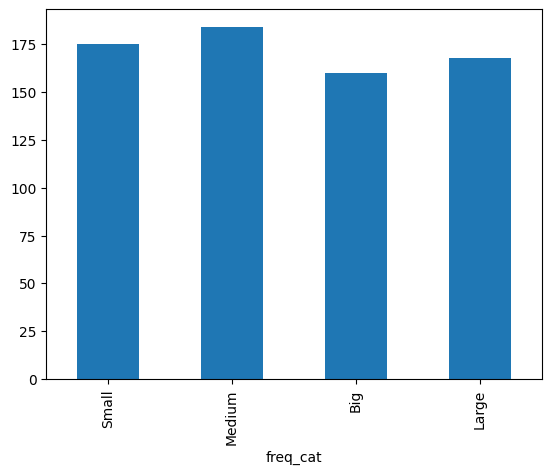

In [85]:
anj = rfm_dive.groupby('freq_cat')['customer_id'].count()
anj.plot(kind='bar')

In [86]:
nyoba = rfm_dive.groupby('recency_cat')['Frequency'].max()
nyoba

recency_cat
1     65
2     87
3     53
4     71
5     56
6     37
7     48
8     26
9     34
10    33
11    31
12    21
Name: Frequency, dtype: int64

<Axes: xlabel='recency_cat'>

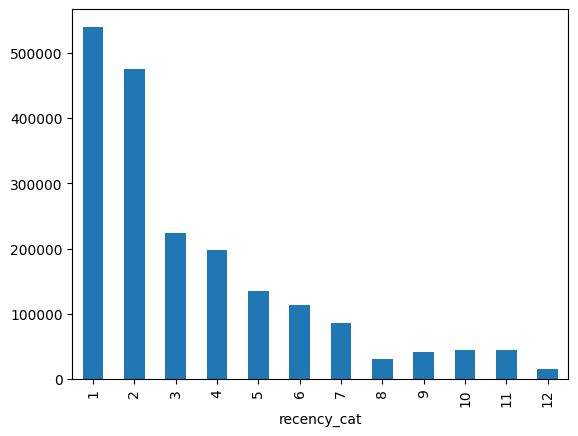

In [87]:
nyoba_lagi = rfm_dive.groupby('recency_cat')['Monetary'].sum()
nyoba_lagi.plot(kind='bar')

In [88]:
anj = rfm_dive.groupby('customer_id')['Monetary'].max().sort_values(ascending=False).head(20)


In [89]:
nyoba = rfm_dive.groupby('recency_cat').aggregate({'Frequency':'count',
                                               'Monetary':'sum'})
nyoba

,Frequency,Monetary
recency_cat,,
1,154,540047.205075
2,141,475327.042825
3,83,223567.192250
4,81,198412.481275
5,45,135087.966000
6,47,113966.369600
7,30,85674.681650
8,27,30537.174000
9,23,41518.973250


#Define Churn

In [90]:
data_churn = data_rfm.copy()

In [91]:
data_churn.describe()

,Recency,Frequency,Monetary
count,693.000000,693.000000,693.000000
mean,104.477633,17.808081,2827.195792
std,92.508732,12.695038,2783.535581
min,0.000000,1.000000,2.376000
25%,34.000000,8.000000,739.550000
50%,75.000000,16.000000,2072.648000
75%,158.000000,25.000000,4162.232000
max,361.000000,87.000000,19282.318500


We assume that customers has recency over 120 and monetary under quantile 25% are identify as a churn. There are 78 customers who identify as a churn and we will try to predict using machine learning model.

In [92]:
chrn = data_churn[(data_churn['Recency'] > 120) & (data_churn['Monetary'] < 739.550000)]
chrn

,customer_id,Recency,Frequency,Monetary
2,AA-10480,259,3,46.656
3,AA-10645,233,2,25.920
13,AC-10660,282,2,287.456
16,AG-10270,278,2,30.016
17,AG-10300,296,2,11.920
...,...,...,...,...
664,TS-21085,182,3,8.424
666,TS-21340,226,3,32.168
680,VG-21805,286,3,26.820
682,VM-21835,265,6,88.920


In [93]:
def churn(row):
  if row['Recency'] > 120 and row['Monetary'] < 739.550000:
    return '1'
  else:
    return '0'


data_churn['Prob_Churn'] = data_churn.apply(churn, axis=1)
data_churn.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn
0,AA-10315,184,5,1111.90000,0
1,AA-10375,48,13,467.15200,0
2,AA-10480,259,3,46.65600,1
3,AA-10645,233,2,25.92000,1
4,AB-10060,105,30,5951.94075,0


<Axes: xlabel='Prob_Churn', ylabel='count'>

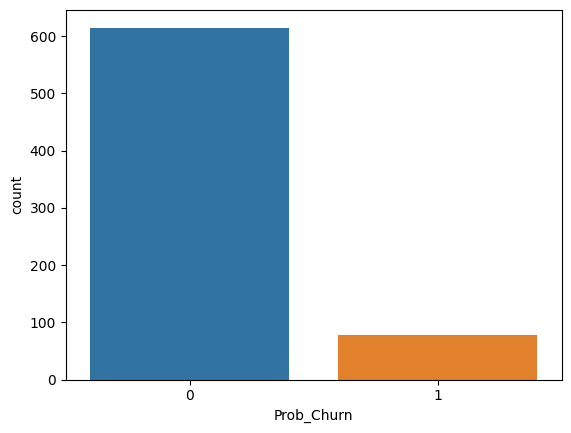

In [94]:
sns.countplot(data_churn, x='Prob_Churn')

#Customer Lifetime Values

In [95]:
df_clv = df.copy()

In [96]:
min_date = df_clv.groupby('customer_id')['order_date'].min()
min_date

customer_id
AA-10315   2020-06-29
AA-10375   2020-07-09
AA-10480   2020-04-15
AA-10645   2020-05-11
AB-10060   2020-05-11
              ...    
XP-21865   2020-06-10
YC-21895   2020-12-26
YS-21880   2020-03-07
ZC-21910   2020-06-11
ZD-21925   2020-11-06
Name: order_date, Length: 693, dtype: datetime64[ns]

In [97]:
current_date = df_clv['order_date'].max()
current_date

Timestamp('2020-12-30 00:00:00')

In [98]:
t = current_date - min_date
t = t.dt.days
t.head()

customer_id
AA-10315    184
AA-10375    174
AA-10480    259
AA-10645    233
AB-10060    233
Name: order_date, dtype: int64

In [99]:
t = t.reset_index()
t.head()

,customer_id,order_date
0,AA-10315,184
1,AA-10375,174
2,AA-10480,259
3,AA-10645,233
4,AB-10060,233


In [100]:
data_new = data_churn.merge(t, on='customer_id')
data_new.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn,order_date
0,AA-10315,184,5,1111.90000,0,184
1,AA-10375,48,13,467.15200,0,174
2,AA-10480,259,3,46.65600,1,259
3,AA-10645,233,2,25.92000,1,233
4,AB-10060,105,30,5951.94075,0,233


In [101]:
data_new.rename(columns = {'order_date':'T'}, inplace=True)
data_new.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T
0,AA-10315,184,5,1111.90000,0,184
1,AA-10375,48,13,467.15200,0,174
2,AA-10480,259,3,46.65600,1,259
3,AA-10645,233,2,25.92000,1,233
4,AB-10060,105,30,5951.94075,0,233


In [102]:
data_new[(data_new['Recency'] == data_new['T'])]

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T
0,AA-10315,184,5,1111.90000,0,184
2,AA-10480,259,3,46.65600,1,259
3,AA-10645,233,2,25.92000,1,233
9,AB-10600,80,23,4348.50300,0,80
10,AC-10420,25,9,776.56000,0,25
...,...,...,...,...,...,...
682,VM-21835,265,6,88.92000,1,265
684,VP-21760,75,9,3447.71675,0,75
685,VS-21820,221,3,513.86400,1,221
689,YC-21895,4,2,974.47450,0,4


In [103]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  693 non-null    object 
 1   Recency      693 non-null    int64  
 2   Frequency    693 non-null    int64  
 3   Monetary     693 non-null    float64
 4   Prob_Churn   693 non-null    object 
 5   T            693 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 37.9+ KB


In [104]:
data_new['Frequency'] = data_new['Frequency'].astype('int')
data_new.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T
0,AA-10315,184,5,1111.90000,0,184
1,AA-10375,48,13,467.15200,0,174
2,AA-10480,259,3,46.65600,1,259
3,AA-10645,233,2,25.92000,1,233
4,AB-10060,105,30,5951.94075,0,233


In [105]:
df_new = data_new.copy()
df_new.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T
0,AA-10315,184,5,1111.90000,0,184
1,AA-10375,48,13,467.15200,0,174
2,AA-10480,259,3,46.65600,1,259
3,AA-10645,233,2,25.92000,1,233
4,AB-10060,105,30,5951.94075,0,233


In [106]:
df_new[['Monetary', 'Recency']].corr()

,Monetary,Recency
Monetary,1.000000,-0.212403
Recency,-0.212403,1.000000


In [107]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(df_new['Frequency'], df_new['Recency'], df_new['T'])

#Predict of expected number of transaction for each customers for one year
df_new['expected_purch'] = bgf.predict(365, df_new['Frequency'], df_new['Recency'], df_new['T'])
df_new.sort_values('expected_purch', ascending=False).head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch
221,EB-13975,0,4,69.248000,0,0,209.949034
181,DJ-13630,12,26,9253.209125,0,12,182.697447
347,JM-15580,0,3,9.072000,0,0,179.177341
439,MF-18250,7,16,3820.451750,0,7,154.253219
564,RM-19675,6,9,3194.863500,0,6,105.391603


In [108]:
df_new['probability_alive'] = bgf.conditional_probability_alive(df_new['Frequency'], df_new['Recency'], df_new['T'])
df_new.head(10)

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive
0,AA-10315,184,5,1111.90000,0,184,8.125464e+00,9.508512e-01
1,AA-10375,48,13,467.15200,0,174,2.219581e-05,1.083268e-06
2,AA-10480,259,3,46.65600,1,259,3.912407e+00,9.427048e-01
3,AA-10645,233,2,25.92000,1,233,3.073062e+00,9.375273e-01
4,AB-10060,105,30,5951.94075,0,233,6.257910e-08,1.777349e-09
5,AB-10105,41,26,6408.30350,0,297,3.096425e-20,1.219704e-21
6,AB-10150,41,15,870.62400,0,265,2.143086e-10,1.282614e-11
7,AB-10165,106,28,1810.06400,0,275,2.855300e-09,9.859862e-11
8,AB-10255,166,14,1878.13800,0,328,2.406014e-02,1.830088e-03
9,AB-10600,80,23,4348.50300,0,80,5.784150e+01,9.784403e-01


In [109]:
#Predict future transaction for the next 365 days based on historical data
t = 365
df_new['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, df_new['Frequency'], df_new['Recency'], df_new['T']))
df_new.sort_values(by='pred_num_txn', ascending=False).head().reset_index()

,index,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn
0,221,EB-13975,0,4,69.248000,0,0,209.949034,0.947090,210.0
1,181,DJ-13630,12,26,9253.209125,0,12,182.697447,0.980285,183.0
2,347,JM-15580,0,3,9.072000,0,0,179.177341,0.942705,179.0
3,439,MF-18250,7,16,3820.451750,0,7,154.253219,0.972419,154.0
4,564,RM-19675,6,9,3194.863500,0,6,105.391603,0.961733,105.0


In [110]:
#Find customer who has Frequency over 1 and if customer has Frequency under 1 or 1, it means that customer is one time buyer
return_customers = df_new[(df_new['Frequency']>1)]
print(return_customers.shape)
return_customers.head()

(687, 9)


,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn
0,AA-10315,184,5,1111.90000,0,184,8.125464e+00,9.508512e-01,8.0
1,AA-10375,48,13,467.15200,0,174,2.219581e-05,1.083268e-06,0.0
2,AA-10480,259,3,46.65600,1,259,3.912407e+00,9.427048e-01,4.0
3,AA-10645,233,2,25.92000,1,233,3.073062e+00,9.375273e-01,3.0
4,AB-10060,105,30,5951.94075,0,233,6.257910e-08,1.777349e-09,0.0


In [111]:
df_new.shape

(693, 9)

In [112]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(df_new['Frequency'], df_new['Monetary'])
df_new['expected_sales'] = ggf.conditional_expected_average_profit(df_new['Frequency'], df_new['Monetary'])
df_new.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn,expected_sales
0,AA-10315,184,5,1111.90000,0,184,8.125464e+00,9.508512e-01,8.0,1175.587707
1,AA-10375,48,13,467.15200,0,174,2.219581e-05,1.083268e-06,0.0,477.230171
2,AA-10480,259,3,46.65600,1,259,3.912407e+00,9.427048e-01,4.0,52.315823
3,AA-10645,233,2,25.92000,1,233,3.073062e+00,9.375273e-01,3.0,31.634558
4,AB-10060,105,30,5951.94075,0,233,6.257910e-08,1.777349e-09,0.0,6005.765472


In [113]:
#Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Sales: {df_new['expected_sales'].mean()}")
print(f"Actual Average Sales': {df_new['Monetary'].mean()}")

Expected Average Sales: 2869.694401345618
Actual Average Sales': 2827.1957920995674


In [114]:
#Calculation customer lifetime value for sales
df_new['CLTV_one_year'] = ggf.customer_lifetime_value(
    bgf,
    df_new['Frequency'],
    df_new['Recency'],
    df_new['T'],
    df_new['Monetary'],
    time=12, #12 month
    freq='D', #frequency values is based by days
    discount_rate=0.01
)
df_new.sort_values('CLTV_one_year', ascending=False).head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn,expected_sales,CLTV_one_year
181,DJ-13630,12,26,9253.209125,0,12,182.697447,0.980285,183.0,9349.832531,1.620855e+06
439,MF-18250,7,16,3820.451750,0,7,154.253219,0.972419,154.0,3885.814118,5.697392e+05
331,JK-15205,61,25,5375.205875,0,61,74.076374,0.979706,74.0,5433.653904,3.784147e+05
564,RM-19675,6,9,3194.863500,0,6,105.391603,0.961733,105.0,3293.397680,3.297936e+05
494,NG-18430,19,15,3517.383750,0,19,91.371664,0.971273,91.0,3581.661800,3.095370e+05


In [115]:
#CLV for sales value
df_new['manual_predicted_clv'] = df_new['pred_num_txn'] * df_new['expected_sales']
df_new.head()

#CLTV_one_year and manual_predicted_clv values are very close each other and seem reasonable for the next one year

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn,expected_sales,CLTV_one_year,manual_predicted_clv
0,AA-10315,184,5,1111.90000,0,184,8.125464e+00,9.508512e-01,8.0,1175.587707,8892.859363,9404.701652
1,AA-10375,48,13,467.15200,0,174,2.219581e-05,1.083268e-06,0.0,477.230171,0.009884,0.000000
2,AA-10480,259,3,46.65600,1,259,3.912407e+00,9.427048e-01,4.0,52.315823,190.123231,209.263291
3,AA-10645,233,2,25.92000,1,233,3.073062e+00,9.375273e-01,3.0,31.634558,90.275381,94.903673
4,AB-10060,105,30,5951.94075,0,233,6.257910e-08,1.777349e-09,0.0,6005.765472,0.000351,0.000000


In [116]:
(len(df_new) / df_new['expected_sales'].sum()) * 100

0.034846916087339946

In [117]:
#CLV in terms of profit(profit margin is 5%)
profit_margin = 0.05
df_new['CLV'] = df_new['CLTV_one_year'] * profit_margin
df_new.head(10)

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn,expected_sales,CLTV_one_year,manual_predicted_clv,CLV
0,AA-10315,184,5,1111.90000,0,184,8.125464e+00,9.508512e-01,8.0,1175.587707,8.892859e+03,9404.701652,4.446430e+02
1,AA-10375,48,13,467.15200,0,174,2.219581e-05,1.083268e-06,0.0,477.230171,9.884206e-03,0.000000,4.942103e-04
2,AA-10480,259,3,46.65600,1,259,3.912407e+00,9.427048e-01,4.0,52.315823,1.901232e+02,209.263291,9.506162e+00
3,AA-10645,233,2,25.92000,1,233,3.073062e+00,9.375273e-01,3.0,31.634558,9.027538e+01,94.903673,4.513769e+00
4,AB-10060,105,30,5951.94075,0,233,6.257910e-08,1.777349e-09,0.0,6005.765472,3.506064e-04,0.000000,1.753032e-05
5,AB-10105,41,26,6408.30350,0,297,3.096425e-20,1.219704e-21,0.0,6475.255091,1.867842e-16,0.000000,9.339209e-18
6,AB-10150,41,15,870.62400,0,265,2.143086e-10,1.282614e-11,0.0,886.684255,1.769886e-07,0.000000,8.849429e-09
7,AB-10165,106,28,1810.06400,0,275,2.855300e-09,9.859862e-11,0.0,1827.687081,4.863785e-06,0.000000,2.431893e-07
8,AB-10255,166,14,1878.13800,0,328,2.406014e-02,1.830088e-03,0.0,1915.059057,4.287087e+01,0.000000,2.143543e+00
9,AB-10600,80,23,4348.50300,0,80,5.784150e+01,9.784403e-01,58.0,4399.971932,2.388291e+05,255198.372072,1.194145e+04


In [118]:
df_new['CLV'].describe()

count     6.930000e+02
mean      7.568366e+02
std       3.730637e+03
min      1.900788e-105
25%       5.329700e-13
50%       1.468554e-01
75%       2.182234e+02
max       8.104275e+04
Name: CLV, dtype: float64

In [119]:
(len(df_new) / df_new['CLV'].sum()) * 100

0.13212891146354508

#Feature Engineering

**Feature Scalling**

In [120]:
df_scale = data_churn.copy()
df_scale.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn
0,AA-10315,184,5,1111.90000,0
1,AA-10375,48,13,467.15200,0
2,AA-10480,259,3,46.65600,1
3,AA-10645,233,2,25.92000,1
4,AB-10060,105,30,5951.94075,0


In [121]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  693 non-null    object 
 1   Recency      693 non-null    int64  
 2   Frequency    693 non-null    int64  
 3   Monetary     693 non-null    float64
 4   Prob_Churn   693 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.5+ KB


In [122]:
std_scaler = StandardScaler()

num_cols = df_scale.select_dtypes(exclude=['object']).columns

for i in num_cols:
  df_scale[i] = std_scaler.fit_transform(df_scale[[i]])

df_scale.head()

,customer_id,Recency,Frequency,Monetary,Prob_Churn
0,AA-10315,0.860241,-1.009633,-0.616674,0
1,AA-10375,-0.610952,-0.379011,-0.848471,0
2,AA-10480,1.671561,-1.167289,-0.999645,1
3,AA-10645,1.390303,-1.246117,-1.007100,1
4,AB-10060,0.005651,0.961063,1.123392,0


In [123]:
label_encoder = preprocessing.LabelEncoder()

cat_cols = df_scale.select_dtypes(include=['object']).columns

for i in cat_cols:
  df_scale[i] = label_encoder.fit_transform(df_scale[[i]])

df_scale.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,customer_id,Recency,Frequency,Monetary,Prob_Churn
0,0,0.860241,-1.009633,-0.616674,0
1,1,-0.610952,-0.379011,-0.848471,0
2,2,1.671561,-1.167289,-0.999645,1
3,3,1.390303,-1.246117,-1.007100,1
4,4,0.005651,0.961063,1.123392,0


#Modelling for Predict Churn

In [124]:
df_scale.shape

(693, 5)

<Axes: xlabel='Prob_Churn', ylabel='count'>

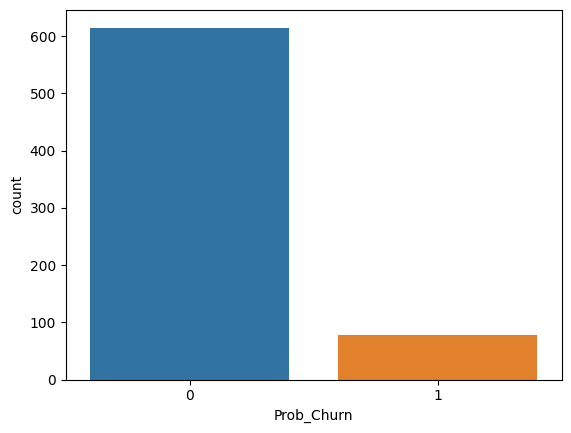

In [127]:
sns.countplot(df_scale, x='Prob_Churn')

In [126]:
df_scale['Prob_Churn'].value_counts()

0    615
1     78
Name: Prob_Churn, dtype: int64

In [144]:
#Handle imbalance data
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df_majority = df_scale[(df_scale['Prob_Churn']==0)]
df_minority = df_scale[(df_scale['Prob_Churn']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 615, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [145]:
df_upsampled['Prob_Churn'].value_counts()

1    615
0    615
Name: Prob_Churn, dtype: int64

In [146]:
X = df_upsampled.iloc[:, 1:4]
y = df_upsampled['Prob_Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [147]:
y

498    1
122    1
653    1
583    1
202    1
      ..
688    0
689    0
690    0
691    0
692    0
Name: Prob_Churn, Length: 1230, dtype: int64

Decision Tree
Train Accuracy: 1.0
Test Accuracy: 1.0
Accuracy 1.0
Precision 1.0
Recall 1.0
F1 Score 1.0


Text(0.5, 1.0, 'Decision Tree Confusion Matrix Heatmap')

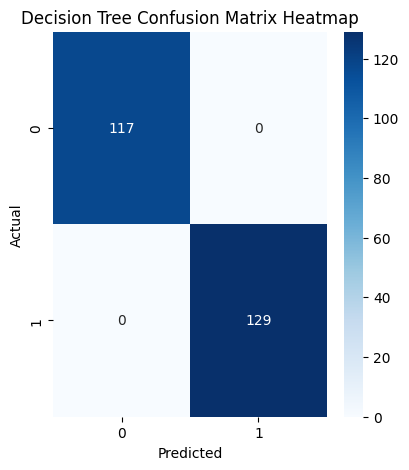

In [148]:
#Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

#Evaluasi metrik klasifikasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

#Print evaluation metrics
print('Decision Tree')
print("Train Accuracy:",model_dt.score(X_train, y_train))
print("Test Accuracy:",model_dt.score(X_test, y_test))
print('Accuracy', accuracy_dt)
print('Precision', precision_dt)
print('Recall', recall_dt)
print('F1 Score', f1_dt)

#Visualize confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix Heatmap')

KNeighbors Classifier
Train Accuracy: 0.9847560975609756
Test Accuracy: 0.983739837398374
Accuracy 0.983739837398374
Precision 0.9699248120300752
Recall 1.0
F1 Score 0.9847328244274809


Text(0.5, 1.0, 'KNeighbors Classifier Confusion Matrix Heatmap')

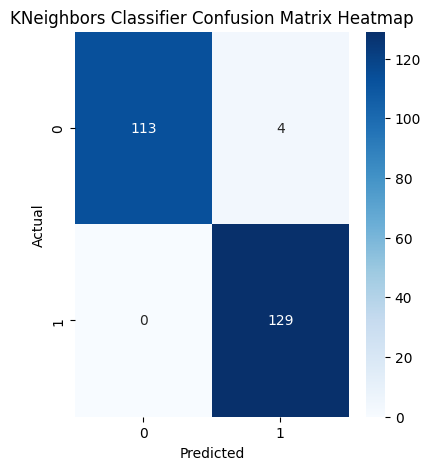

In [149]:
#KNeighborsClassifier
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
y_pred_kn = model_kn.predict(X_test)

#Evaluasi metrik klasifikasi
accuracy_kn = accuracy_score(y_test, y_pred_kn)
precision_kn = precision_score(y_test, y_pred_kn)
recall_kn = recall_score(y_test, y_pred_kn)
f1_kn = f1_score(y_test, y_pred_kn)
conf_matrix_kn = confusion_matrix(y_test, y_pred_kn)

#Print evaluation metrics
print('KNeighbors Classifier')
print("Train Accuracy:",model_kn.score(X_train, y_train))
print("Test Accuracy:",model_kn.score(X_test, y_test))
print('Accuracy', accuracy_kn)
print('Precision', precision_kn)
print('Recall', recall_kn)
print('F1 Score', f1_kn)

#Visualize confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.heatmap(conf_matrix_kn, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNeighbors Classifier Confusion Matrix Heatmap')

Random Forest Classifier
Train Accuracy: 1.0
Test Accuracy: 1.0
Accuracy 1.0
Precision 1.0
Recall 1.0
F1 Score 1.0


Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix Heatmap')

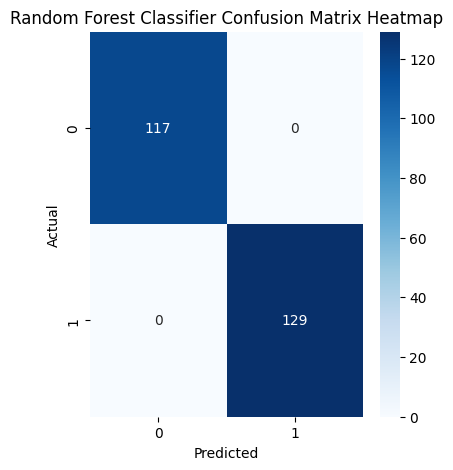

In [150]:
#RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

#Evaluasi metrik klasifikasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

#Print evaluation metrics
print('Random Forest Classifier')
print("Train Accuracy:",model_rf.score(X_train, y_train))
print("Test Accuracy:",model_rf.score(X_test, y_test))
print('Accuracy', accuracy_rf)
print('Precision', precision_rf)
print('Recall', recall_rf)
print('F1 Score', f1_rf)

#Visualize confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix Heatmap')

Logistic Regression
Train Accuracy: 0.9552845528455285
Test Accuracy: 0.9634146341463414
Accuracy 0.9634146341463414
Precision 0.9347826086956522
Recall 1.0
F1 Score 0.9662921348314606


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix Heatmap')

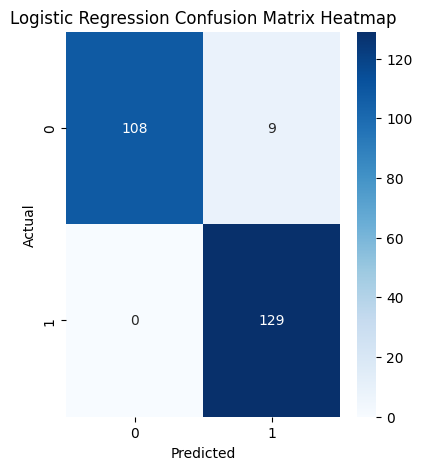

In [151]:
#LogisticRegression
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

#Evaluasi metrik klasifikasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

#Print evaluation metrics
print('Logistic Regression')
print("Train Accuracy:",model_lr.score(X_train, y_train))
print("Test Accuracy:",model_lr.score(X_test, y_test))
print('Accuracy', accuracy_lr)
print('Precision', precision_lr)
print('Recall', recall_lr)
print('F1 Score', f1_lr)

#Visualize confusion matrix
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix Heatmap')

#Customer Segmentation

In [ ]:
df_cs = rfm_score.copy()
df_cs.head()

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score
0,AA-10315,184,4,5,1,1111.90000,2
1,AA-10375,48,2,13,2,467.15200,1
2,AA-10480,259,4,3,1,46.65600,1
3,AA-10645,233,4,2,1,25.92000,1
4,AB-10060,105,3,30,4,5951.94075,4


In [ ]:
std_scale = StandardScaler()
std_scale


num_cols = df_cs[['Recency', 'Frequency', 'Monetary']]

for i in num_cols:
  df_cs[i] = std_scale.fit_transform(df_cs[[i]])

df_cs.head()

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score
0,AA-10315,0.860241,4,-1.009633,1,-0.616674,2
1,AA-10375,-0.610952,2,-0.379011,2,-0.848471,1
2,AA-10480,1.671561,4,-1.167289,1,-0.999645,1
3,AA-10645,1.390303,4,-1.246117,1,-1.007100,1
4,AB-10060,0.005651,3,0.961063,4,1.123392,4


In [ ]:
cat_encode = OrdinalEncoder()

cat_cols = df_cs[['Recency_score','Frequency_score', 'Monetary_score']]

for i in cat_cols:
  df_cs[i] = cat_encode.fit_transform(df_cs[[i]])

df_cs.head()

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score
0,AA-10315,0.860241,3.0,-1.009633,0.0,-0.616674,1.0
1,AA-10375,-0.610952,1.0,-0.379011,1.0,-0.848471,0.0
2,AA-10480,1.671561,3.0,-1.167289,0.0,-0.999645,0.0
3,AA-10645,1.390303,3.0,-1.246117,0.0,-1.007100,0.0
4,AB-10060,0.005651,2.0,0.961063,3.0,1.123392,3.0


In [ ]:
df_cs.drop(columns=['customer_id'], axis=1,inplace=True)

In [ ]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 692
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recency          693 non-null    float64
 1   Recency_score    693 non-null    float64
 2   Frequency        693 non-null    float64
 3   Frequency_score  693 non-null    float64
 4   Monetary         693 non-null    float64
 5   Monetary_score   693 non-null    float64
dtypes: float64(6)
memory usage: 37.9 KB


In [ ]:
possible_k = [i for i in range(2, 21)]
silhouette = []

for k in possible_k:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(df_cs)
  silhouette.append(silhouette_score(X=df_cs, labels=kmeans.labels_))

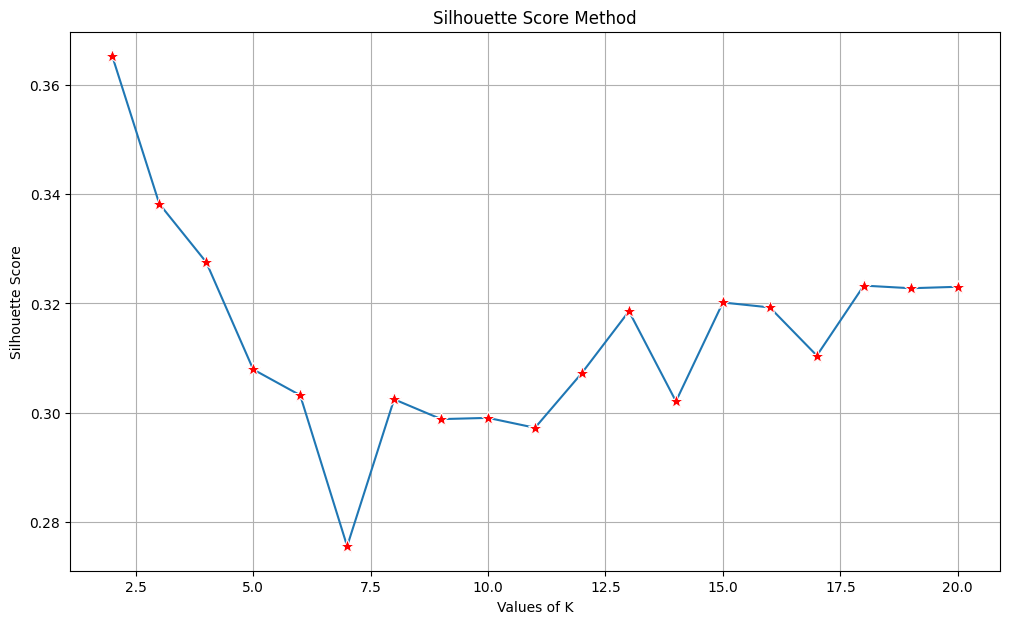

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(
  x=possible_k,
  y=silhouette,
  marker='*',
  markersize=10,
  markerfacecolor='red'
)

plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(
    n_clusters=7,
    random_state=42
).fit(df_cs)

new_rfm = rfm_score.copy()
new_rfm['cluster'] = kmeans.labels_

In [ ]:
new_rfm.head()

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score,cluster
0,AA-10315,184,4,5,1,1111.90000,2,0
1,AA-10375,48,2,13,2,467.15200,1,5
2,AA-10480,259,4,3,1,46.65600,1,0
3,AA-10645,233,4,2,1,25.92000,1,0
4,AB-10060,105,3,30,4,5951.94075,4,1


In [ ]:
new_rfm['cluster'].value_counts()

1    124
4    121
5    119
0    113
2    101
3     84
6     31
Name: cluster, dtype: int64

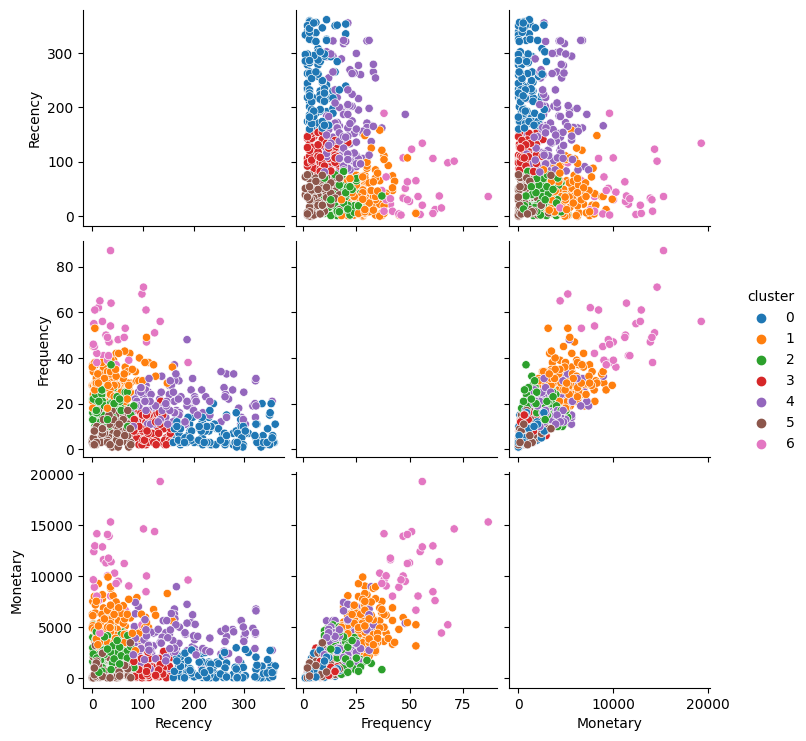

In [ ]:
sns.pairplot(
    data=new_rfm,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)
plt.show()

In [ ]:
#Quantile function
def q25(x):
  return x.quantile(0.25)

def q75(x):
  return x.quantile(0.75)

new_rfm.groupby('cluster').aggregate(['count','mean', 'std', 'min',q25,'median',q75,'max']).transpose()

cluster                     0            1            2            3  \
Recency   count    113.000000   124.000000   101.000000    84.000000   
          mean     248.893805    41.830645    31.663366   109.511905   
          std       60.904545    32.891228    20.520369    22.702632   
          min      160.000000     0.000000     1.000000    77.000000   
          q25      193.000000    14.000000    16.000000    92.000000   
          median   241.000000    36.000000    32.000000   105.500000   
          q75      295.000000    61.000000    43.000000   126.000000   
          max      361.000000   158.000000    82.000000   158.000000   
Frequency count    113.000000   124.000000   101.000000    84.000000   
          mean       6.902655    30.508065    19.425743     8.523810   
          std        4.537472     6.655881     5.210272     4.658135   
          min        1.000000    18.000000    10.000000     2.000000   
          q25        3.000000    26.750000    16.000000     5.000000   
          median     6.000000    29.000000    19.000000     8.000000   
          q75       10.000000    34.000000    22.000000    12.000000   
          max       20.000000    53.000000    37.000000    21.000000   
Monetary  count    113.000000   124.000000   101.000000    84.000000   
          mean     848.326616  5256.031893  2591.718900   801.561728   
          std      794.590304  1711.890126  1209.936807   740.268934   
          min        2.910000  2156.430000   355.537000    18.496000   
          q25      175.104000  3804.003188  1602.216000   207.462000   
          median   574.938000  5093.877375  2404.030000   561.405000   
          q75     1353.886000  6338.179031  3561.797500  1197.955000   
          max     2958.335500  9901.163375  5202.389500  2923.423500   

cluster                     4            5             6  
Recency   count    121.000000   119.000000     31.000000  
          mean     171.198347    37.117647     50.387097  
          std       71.610127    22.584372     45.748353  
          min       80.000000     0.000000      2.000000  
          q25      111.000000    16.000000     17.500000  
          median   154.000000    39.000000     36.000000  
          q75      205.000000    52.000000     68.500000  
          max      355.000000    76.000000    189.000000  
Frequency count    121.000000   119.000000     31.000000  
          mean      20.661157     8.436975     51.483871  
          std        6.662774     4.328930     11.806413  
          min       10.000000     1.000000     36.000000  
          q25       16.000000     5.000000     41.500000  
          median    20.000000     9.000000     49.000000  
          q75       25.000000    11.000000     58.500000  
          max       48.000000    17.000000     87.000000  
Monetary  count    121.000000   119.000000     31.000000  
          mean    3684.649183   846.775874  10836.585399  
          std     1588.745567   751.102524   3165.051116  
          min      794.600000     2.376000   4409.944000  
          q25     2487.695750   188.773000   8969.682813  
          median  3572.804000   682.398000  10288.633875  
          q75     4640.935250  1228.552000  12912.229250  
          max     8954.869750  3447.716750  19282.318500

#Download Data for Tableau

In [ ]:
new_rfm

,customer_id,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score,cluster
0,AA-10315,184,4,5,1,1111.90000,2,0
1,AA-10375,48,2,13,2,467.15200,1,5
2,AA-10480,259,4,3,1,46.65600,1,0
3,AA-10645,233,4,2,1,25.92000,1,0
4,AB-10060,105,3,30,4,5951.94075,4,1
...,...,...,...,...,...,...,...,...
688,XP-21865,43,2,20,3,1864.19200,2,2
689,YC-21895,4,1,2,1,974.47450,2,5
690,YS-21880,9,1,38,4,14156.65675,4,6
691,ZC-21910,54,2,22,3,1372.81400,2,2


In [ ]:
new_rfm.to_csv('file_cluster.csv', index=False)

In [ ]:
df_new

,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn,expected_sales,CLTV_one_year,manual_predicted_clv,CLV
0,AA-10315,184,5,1111.90000,0,184,8.125464e+00,9.508512e-01,8.0,1175.587707,8.892859e+03,9404.701652,4.446430e+02
1,AA-10375,48,13,467.15200,0,174,2.219581e-05,1.083268e-06,0.0,477.230171,9.884206e-03,0.000000,4.942103e-04
2,AA-10480,259,3,46.65600,1,259,3.912407e+00,9.427048e-01,4.0,52.315823,1.901232e+02,209.263291,9.506162e+00
3,AA-10645,233,2,25.92000,1,233,3.073062e+00,9.375273e-01,3.0,31.634558,9.027538e+01,94.903673,4.513769e+00
4,AB-10060,105,30,5951.94075,0,233,6.257910e-08,1.777349e-09,0.0,6005.765472,3.506064e-04,0.000000,1.753032e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,XP-21865,43,20,1864.19200,0,203,2.275260e-11,8.468088e-13,0.0,1889.696404,4.011724e-08,0.000000,2.005862e-09
689,YC-21895,4,2,974.47450,0,4,4.748459e+01,9.375273e-01,47.0,1127.200832,5.073088e+04,52978.439088,2.536544e+03
690,YS-21880,9,38,14156.65675,0,298,3.963642e-55,1.092348e-56,0.0,14257.427503,5.266425e-51,0.000000,2.633212e-52
691,ZC-21910,54,22,1372.81400,0,202,2.141659e-10,7.273596e-12,0.0,1389.902889,2.777890e-07,0.000000,1.388945e-08


In [ ]:
df_new.to_csv('data_clv.csv', index=False)

In [ ]:
anj = pd.read_csv('/content/drive/MyDrive/Datasets/Dashborad RFM, Customer Segmentation/data_clv.csv')
anj

,Unnamed: 0,customer_id,Recency,Frequency,Monetary,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn,expected_sales,CLTV_one_year,manual_predicted_clv,CLV
0,0,AA-10315,184,5,1111.90000,0,184,8.125464e+00,9.508512e-01,8.0,1175.587707,8.892859e+03,9404.701652,4.446430e+02
1,1,AA-10375,48,13,467.15200,0,174,2.219581e-05,1.083268e-06,0.0,477.230171,9.884206e-03,0.000000,4.942103e-04
2,2,AA-10480,259,3,46.65600,1,259,3.912407e+00,9.427048e-01,4.0,52.315823,1.901232e+02,209.263291,9.506162e+00
3,3,AA-10645,233,2,25.92000,1,233,3.073062e+00,9.375273e-01,3.0,31.634558,9.027538e+01,94.903673,4.513769e+00
4,4,AB-10060,105,30,5951.94075,0,233,6.257910e-08,1.777349e-09,0.0,6005.765472,3.506064e-04,0.000000,1.753032e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,688,XP-21865,43,20,1864.19200,0,203,2.275260e-11,8.468088e-13,0.0,1889.696404,4.011724e-08,0.000000,2.005862e-09
689,689,YC-21895,4,2,974.47450,0,4,4.748459e+01,9.375273e-01,47.0,1127.200832,5.073088e+04,52978.439088,2.536544e+03
690,690,YS-21880,9,38,14156.65675,0,298,3.963642e-55,1.092348e-56,0.0,14257.427503,5.266425e-51,0.000000,2.633212e-52
691,691,ZC-21910,54,22,1372.81400,0,202,2.141659e-10,7.273596e-12,0.0,1389.902889,2.777890e-07,0.000000,1.388945e-08


In [ ]:
anj = pd.merge(left=df,right=new_rfm,on='customer_id')
anj

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,...,quantity,discount,profit,Recency,Recency_score,Frequency,Frequency_score,Monetary,Monetary_score,cluster
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,4.0,0.20,8.5568,5,1,53,4,3144.2300,3,1
1,2020-12-03,5387,CA-2017-152786,Standard Class,GA-14725,Consumer,United States,Rogers,Arkansas,72756,...,9.0,0.00,18.5886,5,1,53,4,3144.2300,3,1
2,2020-08-25,875,CA-2017-114636,Standard Class,GA-14725,Consumer,United States,Charlotte,North Carolina,28205,...,5.0,0.20,67.2560,5,1,53,4,3144.2300,3,1
3,2020-11-11,2836,CA-2017-110842,Standard Class,GA-14725,Consumer,United States,Los Angeles,California,90036,...,1.0,0.00,2.8314,5,1,53,4,3144.2300,3,1
4,2020-11-11,2837,CA-2017-110842,Standard Class,GA-14725,Consumer,United States,Los Angeles,California,90036,...,3.0,0.00,9.3312,5,1,53,4,3144.2300,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-28,955,CA-2017-136539,Standard Class,GH-14665,Consumer,United States,Round Rock,Texas,78664,...,2.0,0.32,-11.5960,2,1,4,1,212.0416,1,5
3308,2020-12-28,6090,US-2017-162068,Second Class,PC-18745,Corporate,United States,Loveland,Colorado,80538,...,2.0,0.50,-0.9900,2,1,2,1,2.3760,1,5
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,2.0,0.20,4.5188,0,1,4,1,69.2480,1,5
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,2.0,0.20,6.4750,0,1,4,1,69.2480,1,5


In [ ]:
bgst = pd.merge(left=anj,right=df_new,on='customer_id')
bgst

,order_date,row_id,order_id,ship_mode,customer_id,segment,country,city,state,postal_code,...,Monetary_y,Prob_Churn,T,expected_purch,probability_alive,pred_num_txn,expected_sales,CLTV_one_year,manual_predicted_clv,CLV
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,3144.2300,0,364,3.550716e-95,8.353618e-97,0.0,3160.288193,1.045000e-91,0.000000,5.225002e-93
1,2020-12-03,5387,CA-2017-152786,Standard Class,GA-14725,Consumer,United States,Rogers,Arkansas,72756,...,3144.2300,0,364,3.550716e-95,8.353618e-97,0.0,3160.288193,1.045000e-91,0.000000,5.225002e-93
2,2020-08-25,875,CA-2017-114636,Standard Class,GA-14725,Consumer,United States,Charlotte,North Carolina,28205,...,3144.2300,0,364,3.550716e-95,8.353618e-97,0.0,3160.288193,1.045000e-91,0.000000,5.225002e-93
3,2020-11-11,2836,CA-2017-110842,Standard Class,GA-14725,Consumer,United States,Los Angeles,California,90036,...,3144.2300,0,364,3.550716e-95,8.353618e-97,0.0,3160.288193,1.045000e-91,0.000000,5.225002e-93
4,2020-11-11,2837,CA-2017-110842,Standard Class,GA-14725,Consumer,United States,Los Angeles,California,90036,...,3144.2300,0,364,3.550716e-95,8.353618e-97,0.0,3160.288193,1.045000e-91,0.000000,5.225002e-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-28,955,CA-2017-136539,Standard Class,GH-14665,Consumer,United States,Round Rock,Texas,78664,...,212.0416,0,2,9.506723e+01,9.470897e-01,95.0,228.079124,2.064793e+04,21667.516785,1.032396e+03
3308,2020-12-28,6090,US-2017-162068,Second Class,PC-18745,Corporate,United States,Loveland,Colorado,80538,...,2.3760,0,2,6.376925e+01,9.375273e-01,64.0,4.441590,2.692153e+02,284.261734,1.346077e+01
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,69.2480,0,0,2.099490e+02,9.470897e-01,210.0,75.015906,1.507893e+04,15753.340175,7.539463e+02
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,69.2480,0,0,2.099490e+02,9.470897e-01,210.0,75.015906,1.507893e+04,15753.340175,7.539463e+02


In [ ]:
bgst.to_csv('file_porto.csv', index=False)

In [ ]:
bgst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 3311
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_date            3312 non-null   datetime64[ns]
 1   row_id                3312 non-null   int64         
 2   order_id              3312 non-null   object        
 3   ship_mode             3312 non-null   object        
 4   customer_id           3312 non-null   object        
 5   segment               3312 non-null   object        
 6   country               3312 non-null   object        
 7   city                  3312 non-null   object        
 8   state                 3312 non-null   object        
 9   postal_code           3312 non-null   int64         
 10  region                3312 non-null   object        
 11  product_id            3312 non-null   object        
 12  category              3312 non-null   object        
 13  sub-category      